<a href="https://colab.research.google.com/github/geadalfa/PrediksiWarna/blob/main/Randomforest_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.dates as dates
from datetime import datetime
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt #untuk menampilkan gambar/grafik
import numpy as np #untuk operasi vektor dan matriks dengan mengolah array dan array multidimensi
import cv2 #library OpenCV untuk memanipulasi gambar
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os #untuk dapat berinteraksi dengan sist operasi
pd.set_option('display.max_rows', 100)
pd.options.mode.chained_assignment = None

%matplotlib inline

#Import Dataset


In [ ]:
dataset = pd.read_excel('/content/drive/MyDrive/2017-2018-2019-2020-2021.xlsx')
dataset

,Color,hsv,hue,saturation,brightness,rgb,minggu ke,Ex. Factory Date,Model Long Descriptions,PO Number,Total PO Order Qty,kelas,kelas_2,Date,Year,Month,Season
0,CREAM,"(43.99999999999994, 6.329113924050635, 92.9411...",44.000000,6.329114,92.941176,[237 233 222],1,2017-07-09,ALTO VST-POLY FILL-VEST,4.700613e+09,3798,3.0,3.1,2017-07-09,2017,7,2
1,NAVY,"(240, 100, 50)",240.000000,100.000000,50.000000,[0 0 128],2,2017-07-12,ALTO VST-POLY FILL-VEST,4.700613e+09,9996,11.0,11.2,2017-07-12,2017,7,2
2,OLIVE,"(43.75, 54.54545454545454, 34.509803921568626)",43.750000,54.545455,34.509804,[88 75 40],3,2017-07-23,ALTO VST-POLY FILL-VEST,4.700613e+09,3798,3.0,3.1,2017-07-23,2017,7,2
3,BLACK,"(289.99999999999994, 9.836065573770492, 23.921...",290.000000,9.836066,23.921569,[60 55 61],4,2017-07-31,FAIRWAY JKT-SYNTHETIC-JACKET,4.700627e+09,514,17.0,17.1,2017-07-31,2017,7,2
4,BLACK,"(289.99999999999994, 9.836065573770492, 23.921...",290.000000,9.836066,23.921569,[60 55 61],1,2017-08-01,FAIRWAY JKT-SYNTHETIC-JACKET,4.700627e+09,10222,17.0,17.1,2017-08-01,2017,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,RED,"(349.94011976047904, 94.35028248587571, 69.411...",349.940120,94.350282,69.411765,[177 10 38],4,NaT,NaN,NaN,3430,NaN,NaN,NaT,2021,1,4
172,BLUE,"(225.88235294117646, 73.91304347826086, 36.078...",225.882353,73.913043,36.078431,[24 40 92],1,NaT,NaN,NaN,18,NaN,NaN,NaT,2021,2,4
173,NAVY,"(240, 100, 50)",240.000000,100.000000,50.000000,[0 0 128],2,NaT,NaN,NaN,4050,NaN,NaN,NaT,2021,2,4
174,NAVY,"(240, 100, 50)",240.000000,100.000000,50.000000,[0 0 128],3,NaT,NaN,NaN,3696,NaN,NaN,NaT,2021,2,4


# Visualisasi

In [ ]:
#@title
th2017 = pd.DataFrame(dataset, columns=['Color', 'Total PO  Order Qty', 'minggu ke', 'Ex. Factory Date', 'Year'])
th2017 = th2017[th2017.Year == 2017]
th2017

,Color,Total PO Order Qty,minggu ke,Ex. Factory Date,Year
0,CREAM,3798,1,2017-07-09,2017
1,NAVY,9996,2,2017-07-12,2017
2,OLIVE,3798,3,2017-07-23,2017
3,BLACK,514,4,2017-07-31,2017
4,BLACK,10222,1,2017-08-01,2017
5,NAVY,5044,2,2017-08-10,2017
6,RED,2000,3,2017-08-17,2017
7,SAPPHIRE STAR,1900,4,2017-08-27,2017
8,BLACK,5384,1,2017-09-01,2017
9,NAVY,4577,2,2017-09-10,2017


In [ ]:
#@title
navy = th2017[th2017.Color == 'NAVY']
navy

,Color,Total PO Order Qty,minggu ke,Ex. Factory Date,Year
1,NAVY,9996,2,2017-07-12,2017
5,NAVY,5044,2,2017-08-10,2017
9,NAVY,4577,2,2017-09-10,2017
12,NAVY,545,1,2017-10-02,2017
15,NAVY,1060,4,2017-10-27,2017
19,NAVY,6355,4,2017-11-28,2017
20,NAVY,6342,1,2017-12-05,2017


In [ ]:
#@title
navy.dtypes

Color                          object
Total PO  Order Qty             int64
minggu ke                       int64
Ex. Factory Date       datetime64[ns]
Year                            int64
dtype: object

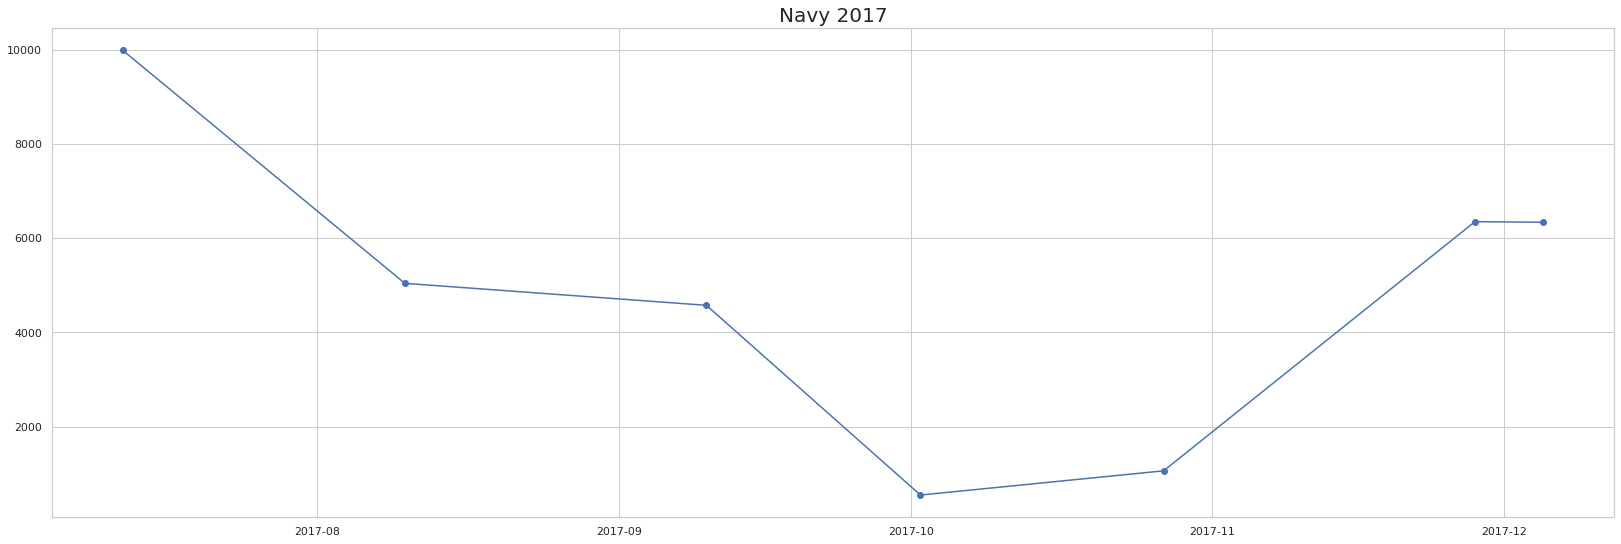

In [ ]:
#@title
import seaborn as sns
plt.figure(figsize=(28,9))
sns.set(style="whitegrid")

plt.title('Navy 2017', fontsize=20)
plt.plot(navy['Ex. Factory Date'], navy['Total PO  Order Qty'])
plt.scatter(navy['Ex. Factory Date'], navy['Total PO  Order Qty'])

In [ ]:
#@title
th2018 = pd.DataFrame(dataset, columns=['Color', 'Total PO  Order Qty', 'minggu ke', 'Ex. Factory Date', 'Year'])
th2018 = th2018[th2018.Year == 2018]
#th2018

In [ ]:
#@title
navy2 = th2018[th2018.Color == 'NAVY']
navy2

,Color,Total PO Order Qty,minggu ke,Ex. Factory Date,Year
27,NAVY,8898,4,2018-01-28,2018
29,NAVY,3304,2,2018-02-11,2018
31,NAVY,255,4,2018-02-25,2018
33,NAVY,5525,2,2018-03-13,2018
37,NAVY,2258,2,2018-04-11,2018
42,NAVY,8413,3,2018-05-23,2018
45,NAVY,24389,2,2018-06-11,2018
48,NAVY,30,1,2018-07-01,2018
49,NAVY,130,2,2018-07-13,2018
50,NAVY,254,3,2018-07-24,2018


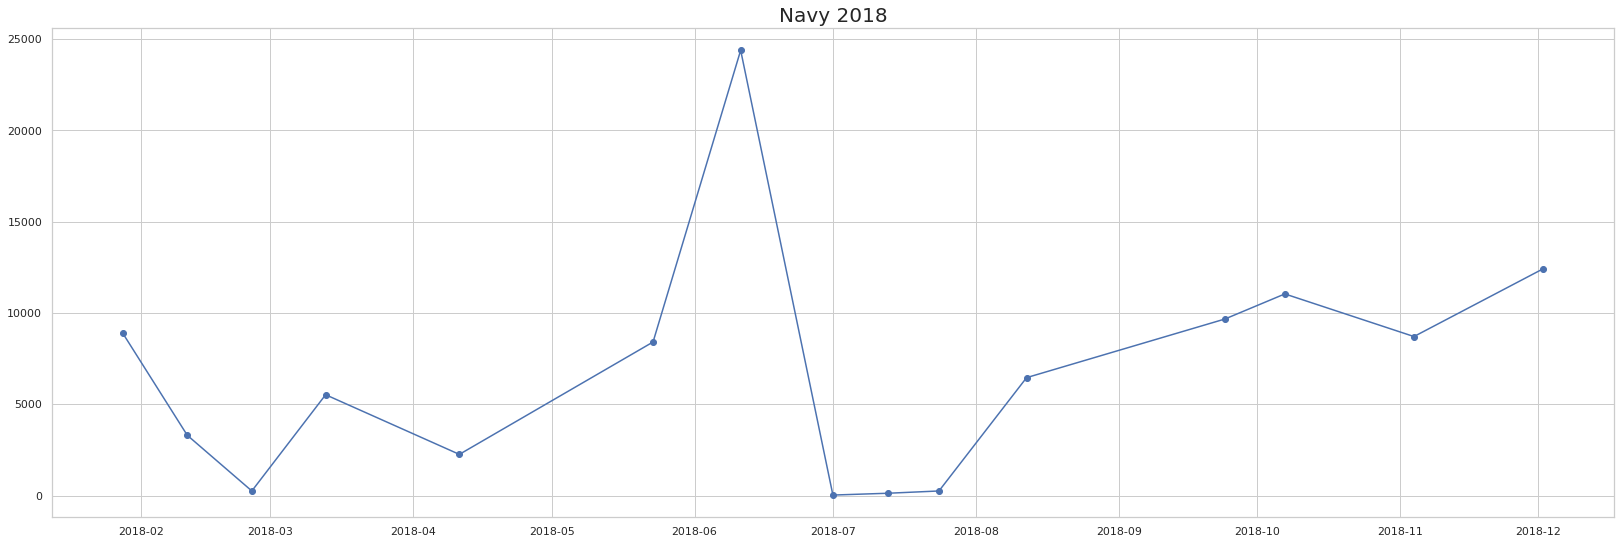

In [ ]:
#@title
plt.figure(figsize=(28,9))
sns.set(style="whitegrid")

plt.title('Navy 2018', fontsize=20)
plt.plot(navy2['Ex. Factory Date'], navy2['Total PO  Order Qty'])
plt.scatter(navy2['Ex. Factory Date'], navy2['Total PO  Order Qty'])

In [ ]:
#@title
th2019 = pd.DataFrame(dataset, columns=['Color', 'Total PO  Order Qty', 'minggu ke', 'Ex. Factory Date', 'Year'])
th2019 = th2019[th2019.Year == 2019]
#th2019

In [ ]:
#@title
navy3 = th2019[th2019.Color == 'NAVY']
navy3

,Color,Total PO Order Qty,minggu ke,Ex. Factory Date,Year
74,NAVY,1988,3,2019-01-23,2019
76,NAVY,413,1,2019-02-05,2019
78,NAVY,521,3,2019-02-21,2019
81,NAVY,13117,2,2019-03-12,2019
84,NAVY,22523,1,2019-04-07,2019
89,NAVY,12984,2,2019-05-15,2019
94,NAVY,11150,3,2019-06-24,2019
97,NAVY,8863,2,2019-07-11,2019
100,NAVY,6634,1,2019-08-04,2019
107,NAVY,9593,4,2019-09-29,2019


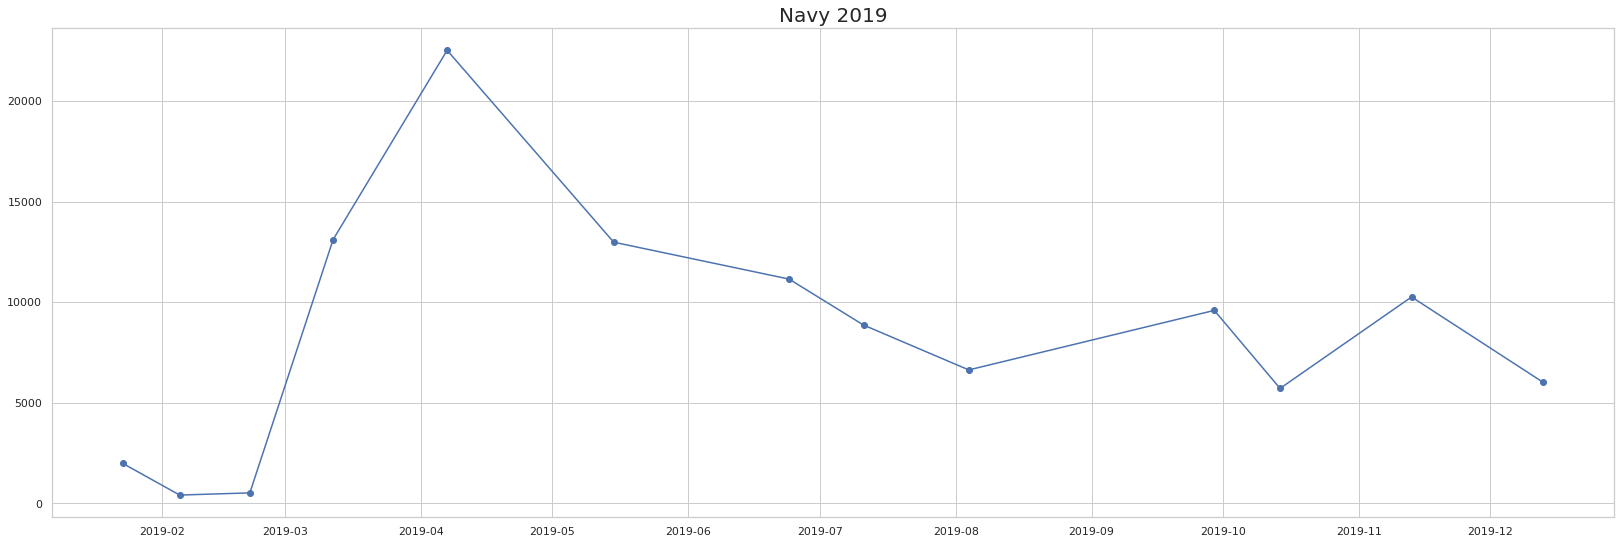

In [ ]:
#@title
plt.figure(figsize=(28,9))
sns.set(style="whitegrid")

plt.title('Navy 2019', fontsize=20)
plt.plot(navy3['Ex. Factory Date'], navy3['Total PO  Order Qty'])
plt.scatter(navy3['Ex. Factory Date'], navy3['Total PO  Order Qty'])

In [ ]:
#@title
th2020 = pd.DataFrame(dataset, columns=['Color', 'Total PO  Order Qty', 'minggu ke', 'Ex. Factory Date', 'Year'])
th2020 = th2020[th2020.Year == 2020]
#th2020

In [ ]:
#@title
navy4 = th2020[th2020.Color == 'NAVY']
navy4

,Color,Total PO Order Qty,minggu ke,Ex. Factory Date,Year
121,NAVY,5130,2,2020-01-11,2020
125,NAVY,6766,2,2020-02-12,2020
130,NAVY,1985,3,2020-03-21,2020
135,NAVY,4800,4,2020-04-28,2020
138,NAVY,11471,3,2020-05-23,2020
143,NAVY,7213,4,2020-06-27,2020
146,NAVY,10240,3,2020-07-25,2020
150,NAVY,13109,3,2020-08-24,2020
152,NAVY,8471,1,2020-09-06,2020
156,NAVY,5376,1,2020-10-04,2020


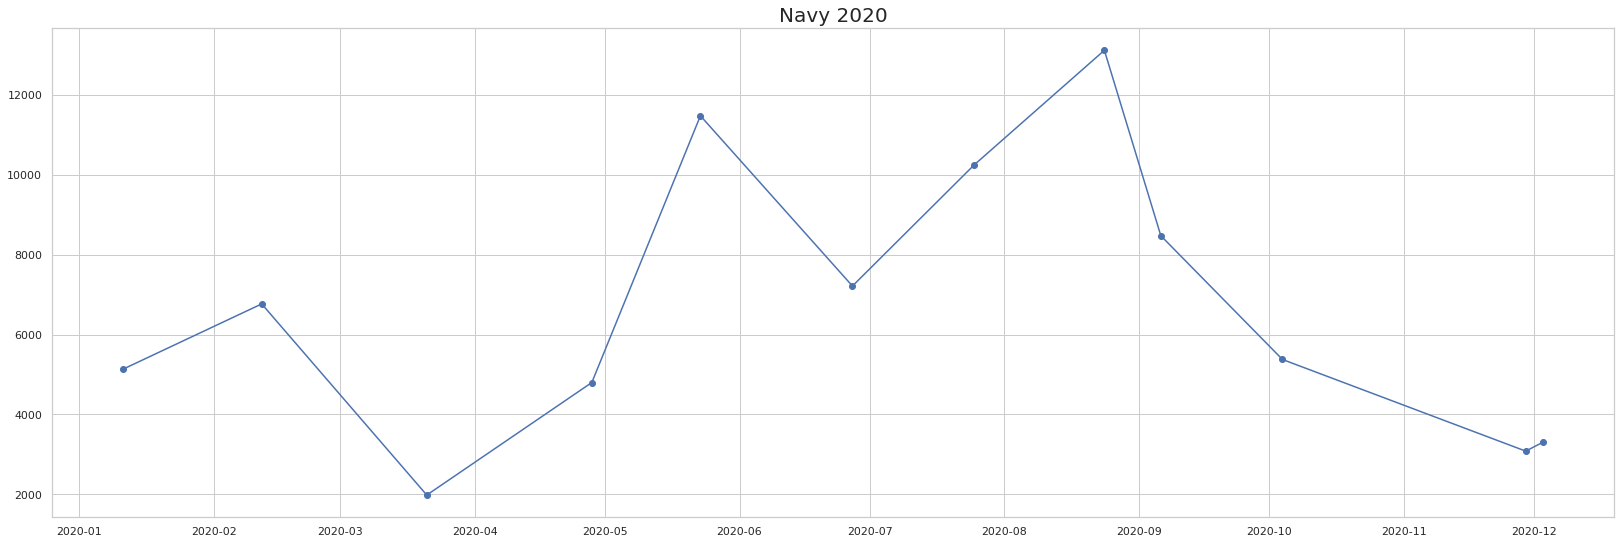

In [ ]:
#@title
plt.figure(figsize=(28,9))
sns.set(style="whitegrid")

plt.title('Navy 2020', fontsize=20)
plt.plot(navy4['Ex. Factory Date'], navy4['Total PO  Order Qty'])
plt.scatter(navy4['Ex. Factory Date'], navy4['Total PO  Order Qty'])

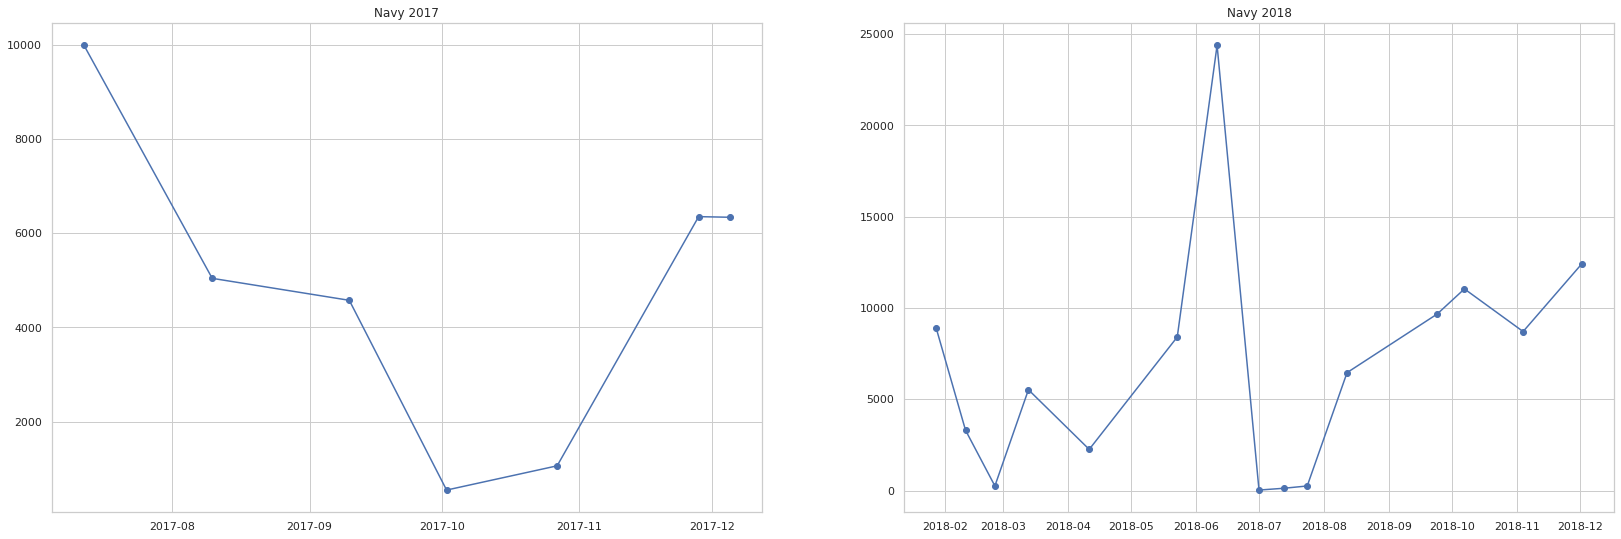

In [ ]:
#@title
# 1 : 2
# 1 : 3
# 1 : 4
sns.set(style="whitegrid")
fig = plt.figure(figsize=(28, 9))
x = navy['Ex. Factory Date']
y = navy['Total PO  Order Qty']

x2 = navy2['Ex. Factory Date']
y2 = navy2['Total PO  Order Qty']

x3 = navy3['Ex. Factory Date']
y3 = navy3['Total PO  Order Qty']

x4 = navy4['Ex. Factory Date']
y4 = navy4['Total PO  Order Qty']

# Adds subplot on position 1
ax = fig.add_subplot(121)
# Adds subplot on position 2
ax2 = fig.add_subplot(122)

ax.title.set_text('Navy 2017')
ax.plot(x, y)
ax.scatter(x, y)

ax2.title.set_text('Navy 2018')
ax2.plot(x2, y2)
ax2.scatter(x2, y2)

plt.show()

# 2 : 3
# 2 : 4

# 3 : 4

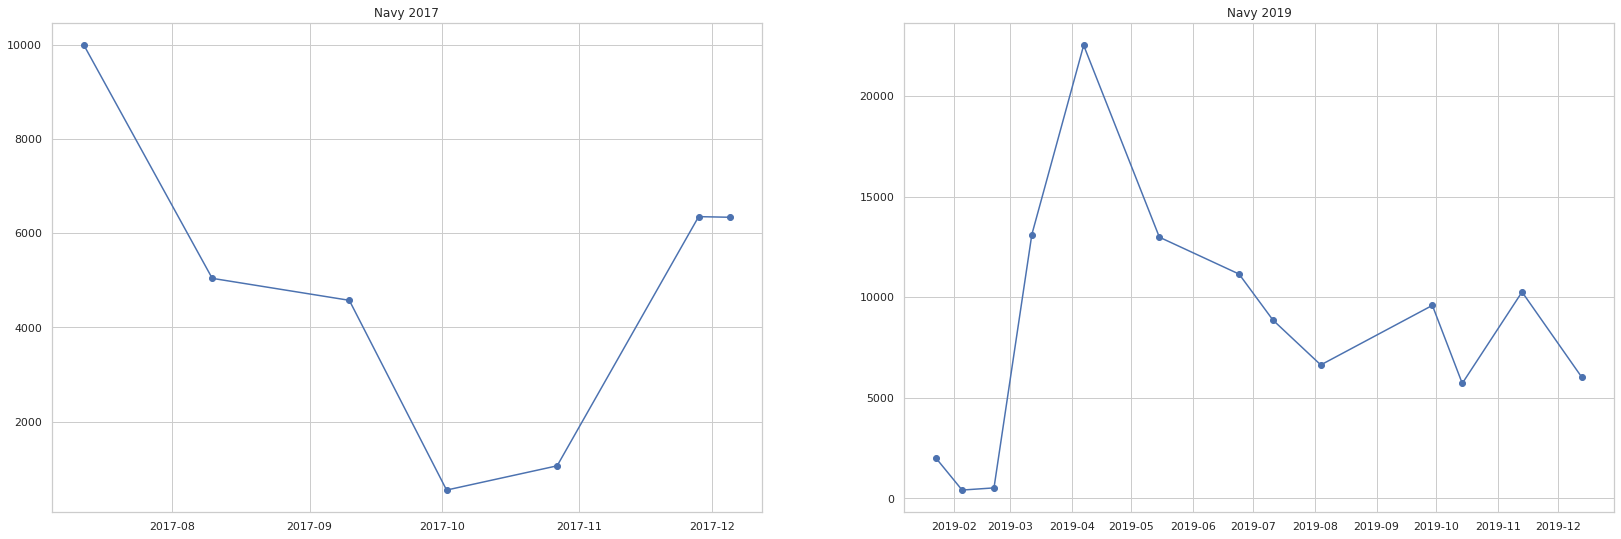

In [ ]:
#@title
sns.set(style="whitegrid")
fig = plt.figure(figsize=(28, 9))
ax3 = fig.add_subplot(121)
ax4 = fig.add_subplot(122)

x3 = navy3['Ex. Factory Date']
y3 = navy3['Total PO  Order Qty']

ax3.title.set_text('Navy 2017')
ax3.plot(x, y)
ax3.scatter(x, y)

ax4.title.set_text('Navy 2019')
ax4.plot(x3, y3)
ax4.scatter(x3, y3)


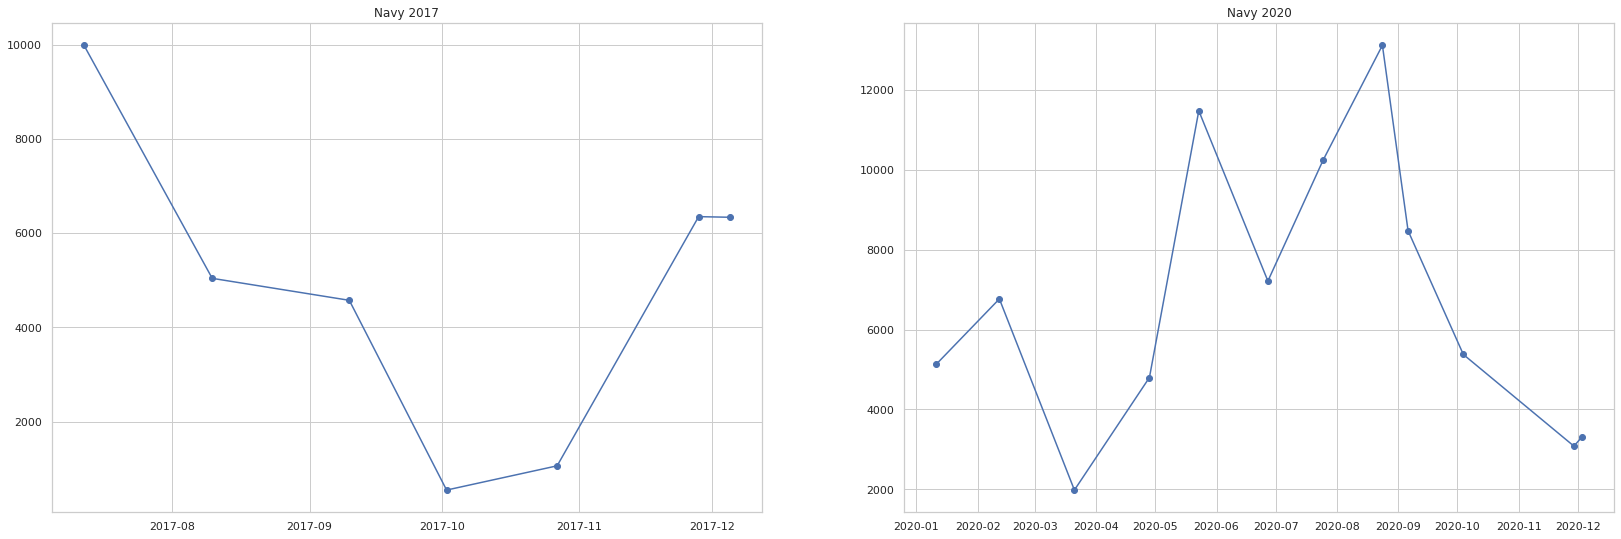

In [ ]:
#@title
sns.set(style="whitegrid")
fig = plt.figure(figsize=(28, 9))
ax5 = fig.add_subplot(121)
ax6 = fig.add_subplot(122)

x4 = navy4['Ex. Factory Date']
y4 = navy4['Total PO  Order Qty']

ax5.title.set_text('Navy 2017')
ax5.plot(x, y)
ax5.scatter(x, y)

ax6.title.set_text('Navy 2020')
ax6.plot(x4, y4)
ax6.scatter(x4, y4)

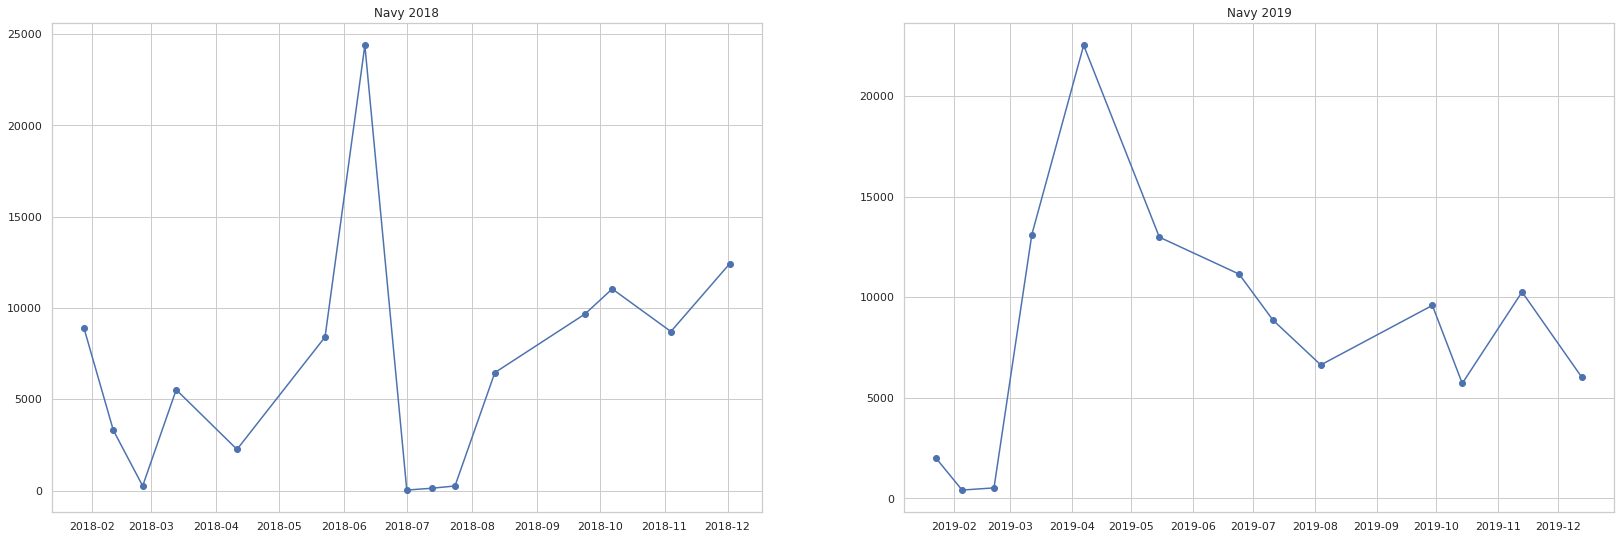

In [ ]:
#@title
sns.set(style="whitegrid")
fig = plt.figure(figsize=(28, 9))
ax7 = fig.add_subplot(121)
ax8 = fig.add_subplot(122)

ax7.title.set_text('Navy 2018')
ax7.plot(x2, y2)
ax7.scatter(x2, y2)

ax8.title.set_text('Navy 2019')
ax8.plot(x3, y3)
ax8.scatter(x3, y3)

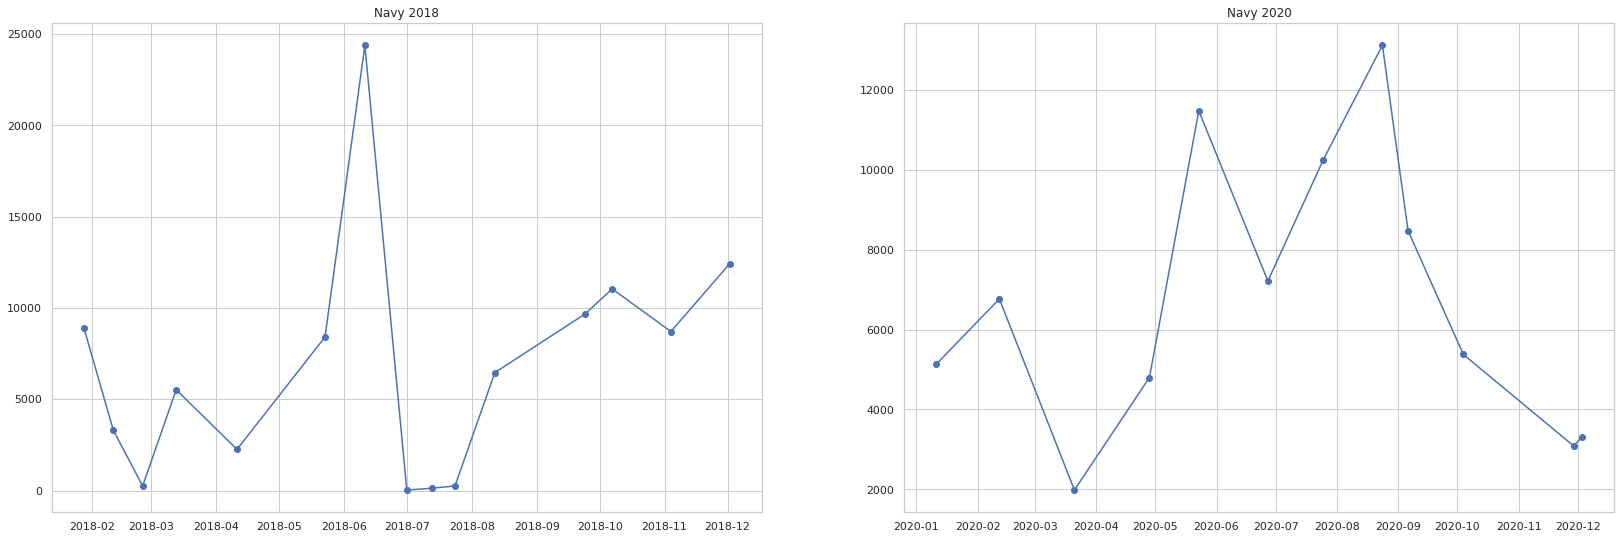

In [ ]:
#@title
sns.set(style="whitegrid")
fig = plt.figure(figsize=(28, 9))
ax9 = fig.add_subplot(121)
ax10 = fig.add_subplot(122)

ax9.title.set_text('Navy 2018')
ax9.plot(x2, y2)
ax9.scatter(x2, y2)

ax10.title.set_text('Navy 2020')
ax10.plot(x4, y4)
ax10.scatter(x4, y4)

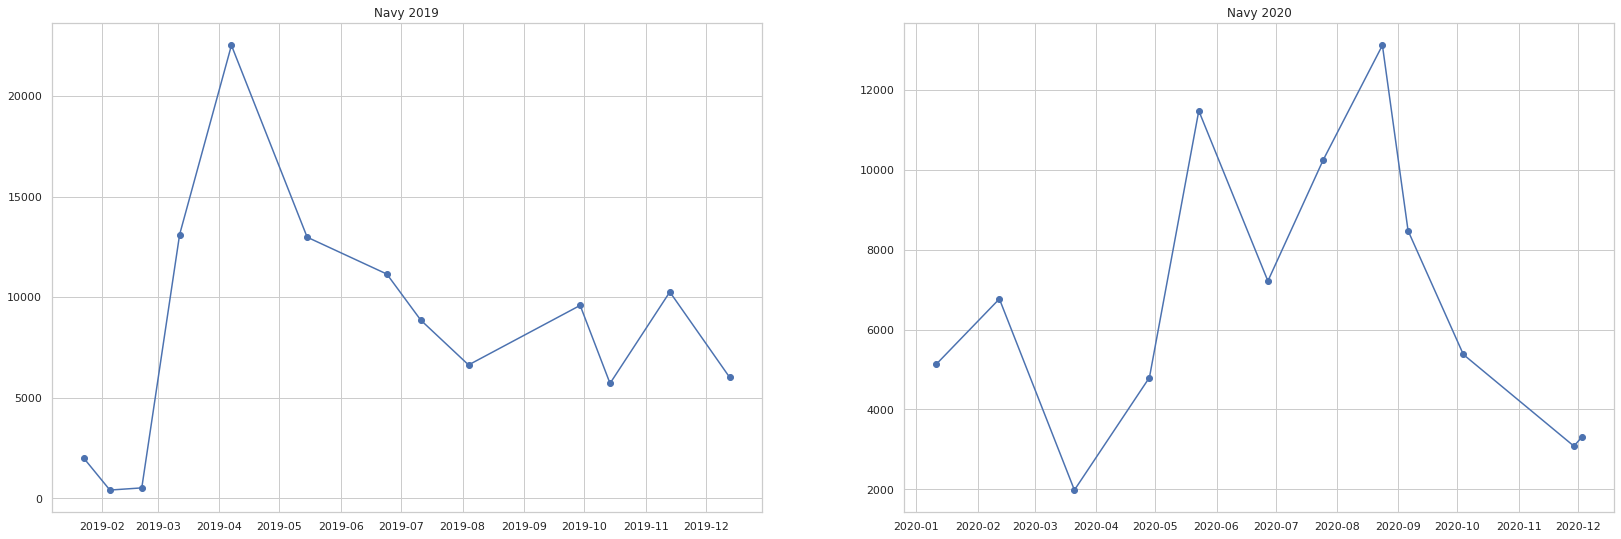

In [ ]:
#@title
sns.set(style="whitegrid")
fig = plt.figure(figsize=(28, 9))
ax11 = fig.add_subplot(121)
ax12 = fig.add_subplot(122)

ax11.title.set_text('Navy 2019')
ax11.plot(x3, y3)
ax11.scatter(x3, y3)

ax12.title.set_text('Navy 2020')
ax12.plot(x4, y4)
ax12.scatter(x4, y4)

# Preprocessing



In [ ]:
dataset['Color'].value_counts()

NAVY             50
BLACK            31
BLUE             19
GREY             19
MULTI            13
RED              12
SAPPHIRE STAR     9
WHITE             8
GREEN             5
BAKER RED         3
OLIVE             2
MANGO             2
CREAM             1
PINK              1
BLUE MIST         1
Name: Color, dtype: int64

In [ ]:
def fc(row):
    if row['Color'] =='BAKER RED':
        val = 1
    elif row['Color'] == 'BLACK' :
        val = 2
    # elif row['Color'] == 'BLACKWATCH PLAID' :
    #     val = 3
    elif row['Color'] == 'BLUE' :
        val = 3
    elif row['Color'] == 'BLUE MIST' :
        val = 4
    elif row['Color'] == 'CREAM' :
        val = 5
    elif row['Color'] == 'GREEN' :
        val = 6
    elif row['Color'] == 'GREY' :
        val = 7
    elif row['Color'] == 'MANGO' :
        val = 8
    elif row['Color'] == 'MULTI' :
        val = 9
    elif row['Color'] == 'NAVY' :
        val = 10
    elif row['Color'] == 'OLIVE' :
        val = 11
    elif row['Color'] == 'PINK' :
        val = 12
    elif row['Color'] == 'RED' :
        val = 13
    elif row['Color'] == 'SAPPHIRE STAR' :
        val = 14
    else:
        val = 15
    return val

dataset['color_int'] = dataset.apply(fc, axis=1)
dataset.head()

,Color,hsv,hue,saturation,brightness,rgb,minggu ke,Ex. Factory Date,Model Long Descriptions,PO Number,Total PO Order Qty,kelas,kelas_2,Date,Year,Month,Season,color_int
0,CREAM,"(43.99999999999994, 6.329113924050635, 92.9411...",44.00,6.329114,92.941176,[237 233 222],1,2017-07-09,ALTO VST-POLY FILL-VEST,4.700613e+09,3798,3.0,3.1,2017-07-09,2017,7,2,5
1,NAVY,"(240, 100, 50)",240.00,100.000000,50.000000,[0 0 128],2,2017-07-12,ALTO VST-POLY FILL-VEST,4.700613e+09,9996,11.0,11.2,2017-07-12,2017,7,2,10
2,OLIVE,"(43.75, 54.54545454545454, 34.509803921568626)",43.75,54.545455,34.509804,[88 75 40],3,2017-07-23,ALTO VST-POLY FILL-VEST,4.700613e+09,3798,3.0,3.1,2017-07-23,2017,7,2,11
3,BLACK,"(289.99999999999994, 9.836065573770492, 23.921...",290.00,9.836066,23.921569,[60 55 61],4,2017-07-31,FAIRWAY JKT-SYNTHETIC-JACKET,4.700627e+09,514,17.0,17.1,2017-07-31,2017,7,2,2
4,BLACK,"(289.99999999999994, 9.836065573770492, 23.921...",290.00,9.836066,23.921569,[60 55 61],1,2017-08-01,FAIRWAY JKT-SYNTHETIC-JACKET,4.700627e+09,10222,17.0,17.1,2017-08-01,2017,8,2,2


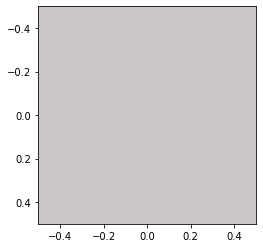

In [ ]:
import matplotlib.pyplot as plt
plt.imshow([[(203, 198, 199)]])
#rgb(893,446,-1785)

In [ ]:
dataset['color_int'].value_counts()

10    50
2     31
7     19
3     19
9     13
13    12
14     9
15     8
6      5
1      3
11     2
8      2
12     1
5      1
4      1
Name: color_int, dtype: int64

In [ ]:
dataset.dtypes

Color                              object
hsv                                object
hue                               float64
saturation                        float64
brightness                        float64
rgb                                object
minggu ke                           int64
Ex. Factory Date           datetime64[ns]
Model Long Descriptions            object
PO Number                         float64
Total PO  Order Qty                 int64
kelas                             float64
kelas_2                           float64
Date                       datetime64[ns]
Year                                int64
Month                               int64
Season                              int64
color_int                           int64
dtype: object

In [ ]:
df = dataset.astype({"Date": str})
df.dtypes

Color                              object
hsv                                object
hue                               float64
saturation                        float64
brightness                        float64
rgb                                object
minggu ke                           int64
Ex. Factory Date           datetime64[ns]
Model Long Descriptions            object
PO Number                         float64
Total PO  Order Qty                 int64
kelas                             float64
kelas_2                           float64
Date                               object
Year                                int64
Month                               int64
Season                              int64
color_int                           int64
dtype: object

In [ ]:
df = df.assign(tgl = df.Year.astype(str) + '' + df.Month.astype(str) + '' + df['minggu ke'].astype(str))
df['Date'].replace('-','', regex=True, inplace=True)
df

,Color,hsv,hue,saturation,brightness,rgb,minggu ke,Ex. Factory Date,Model Long Descriptions,PO Number,Total PO Order Qty,kelas,kelas_2,Date,Year,Month,Season,color_int,tgl
0,CREAM,"(43.99999999999994, 6.329113924050635, 92.9411...",44.000000,6.329114,92.941176,[237 233 222],1,2017-07-09,ALTO VST-POLY FILL-VEST,4.700613e+09,3798,3.0,3.1,20170709,2017,7,2,5,201771
1,NAVY,"(240, 100, 50)",240.000000,100.000000,50.000000,[0 0 128],2,2017-07-12,ALTO VST-POLY FILL-VEST,4.700613e+09,9996,11.0,11.2,20170712,2017,7,2,10,201772
2,OLIVE,"(43.75, 54.54545454545454, 34.509803921568626)",43.750000,54.545455,34.509804,[88 75 40],3,2017-07-23,ALTO VST-POLY FILL-VEST,4.700613e+09,3798,3.0,3.1,20170723,2017,7,2,11,201773
3,BLACK,"(289.99999999999994, 9.836065573770492, 23.921...",290.000000,9.836066,23.921569,[60 55 61],4,2017-07-31,FAIRWAY JKT-SYNTHETIC-JACKET,4.700627e+09,514,17.0,17.1,20170731,2017,7,2,2,201774
4,BLACK,"(289.99999999999994, 9.836065573770492, 23.921...",290.000000,9.836066,23.921569,[60 55 61],1,2017-08-01,FAIRWAY JKT-SYNTHETIC-JACKET,4.700627e+09,10222,17.0,17.1,20170801,2017,8,2,2,201781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,RED,"(349.94011976047904, 94.35028248587571, 69.411...",349.940120,94.350282,69.411765,[177 10 38],4,NaT,NaN,NaN,3430,NaN,NaN,NaT,2021,1,4,13,202114
172,BLUE,"(225.88235294117646, 73.91304347826086, 36.078...",225.882353,73.913043,36.078431,[24 40 92],1,NaT,NaN,NaN,18,NaN,NaN,NaT,2021,2,4,3,202121
173,NAVY,"(240, 100, 50)",240.000000,100.000000,50.000000,[0 0 128],2,NaT,NaN,NaN,4050,NaN,NaN,NaT,2021,2,4,10,202122
174,NAVY,"(240, 100, 50)",240.000000,100.000000,50.000000,[0 0 128],3,NaT,NaN,NaN,3696,NaN,NaN,NaT,2021,2,4,10,202123


In [ ]:
#df = df.astype({"Date": int})
#df = df.astype({"tgl": int})
#df.dtypes

In [ ]:
# Menghapus kelas
df.drop(columns=['kelas', 'kelas_2'], axis=1, inplace=True)
#df.head(2)

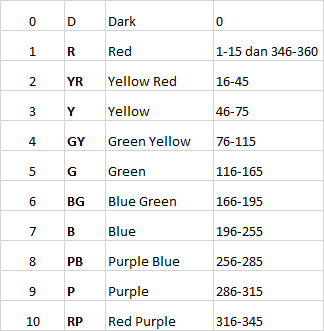

In [ ]:
# Menghapus kelas
dataset.drop(columns=['kelas', 'kelas_2'])
#df.head(2)

def rc(row):
    if row['hue'] < 0.5 :
        val = 0
    elif row['hue'] <= 15 :
        val = 1
    elif row['hue'] <= 45 :
        val = 2
    elif row['hue'] <= 75 :
        val = 3
    elif row['hue'] <= 115 :
        val = 4
    elif row['hue'] <= 165 :
        val = 5
    elif row['hue'] <= 195 :
        val = 6
    elif row['hue'] <= 255 :
        val = 7
    elif row['hue'] <= 285 :
        val = 8
    elif row['hue'] <= 315 :
        val = 9
    elif row['hue'] <= 345 :
        val = 10
    else:
        val = 1
    return val

dataset['range_warna'] = dataset.apply(rc, axis=1)
dataset.head(2)

,Color,hsv,hue,saturation,brightness,rgb,minggu ke,Ex. Factory Date,Model Long Descriptions,PO Number,Total PO Order Qty,kelas,kelas_2,Date,Year,Month,Season,color_int,range_warna
0,CREAM,"(43.99999999999994, 6.329113924050635, 92.9411...",44.0,6.329114,92.941176,[237 233 222],1,2017-07-09,ALTO VST-POLY FILL-VEST,4.700613e+09,3798,3.0,3.1,2017-07-09,2017,7,2,5,2
1,NAVY,"(240, 100, 50)",240.0,100.000000,50.000000,[0 0 128],2,2017-07-12,ALTO VST-POLY FILL-VEST,4.700613e+09,9996,11.0,11.2,2017-07-12,2017,7,2,10,7


In [ ]:
# decimals = 2    
# dataset['hue'] = dataset['hue'].apply(lambda x: round(x, decimals))
# dataset['saturation'] = dataset['saturation'].apply(lambda x: round(x, decimals))
# dataset['brightness'] = dataset['brightness'].apply(lambda x: round(x, decimals))

In [ ]:
# X2 dan y2 untuk model ke 2

# X = df.drop(columns=['hsv','kelas_2','Model Long Descriptions','PO Number','rgb','Ex. Factory Date','hue','Color','Date', 'saturation', 'brightness', 'kelas', 'color_int'])
#y = df['hue']
#X = df.drop(columns=['hsv','kelas_2','Model Long Descriptions','PO Number','rgb','Ex. Factory Date','hue','Color','Date', 'color_int'])
#X = df.drop(columns=['hsv','kelas_2','Model Long Descriptions','PO Number','rgb','Ex. Factory Date','hue','Color', 
                     #'color_int', 'Year', 'Month', 'kelas', 'minggu ke', 'Date'])
# X = df.drop(columns=['hsv','Model Long Descriptions','PO Number','rgb','Ex. Factory Date','hue','Color', 
#                      'Date', 'tgl', 'color_int'])
# y = df['hue']

# X2 = df.drop(columns=['hsv','Model Long Descriptions','PO Number','rgb','Ex. Factory Date','hue','Color', 'hue', 'color_int',
#                       'Year', 'Month', 'minggu ke'])
# y2 = df['color_int']
# X3 = df.drop(columns=['hsv','Model Long Descriptions','PO Number', 'Ex. Factory Date','hue','Color', 
#                      'color_int', 'Date', 'tgl'])
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

x = dataset.drop(columns=['Color','hsv','kelas','kelas_2','Model Long Descriptions',
                          'PO Number','rgb','Ex. Factory Date','hue','Date','color_int'])
df3 = dataset.drop(columns=['Color','hsv','kelas','kelas_2','Model Long Descriptions',
                          'PO Number','rgb','Ex. Factory Date', 'Date','color_int'])
y = dataset['hue']

In [ ]:
df3.to_excel("variabelfix.xlsx")
#x.to_excel("trainvar.xlsx")

In [ ]:
print(x.columns)
#print(X.columns)
#print(X2.columns)
print(y)
#print(y)

Index(['saturation', 'brightness', 'minggu ke', 'Total PO  Order Qty', 'Year',
       'Month', 'Season', 'range_warna'],
      dtype='object')
0       44.000000
1      240.000000
2       43.750000
3      290.000000
4      290.000000
          ...    
171    349.940120
172    225.882353
173    240.000000
174    240.000000
175      0.000000
Name: hue, Length: 176, dtype: float64


In [ ]:
x

,saturation,brightness,minggu ke,Total PO Order Qty,Year,Month,Season,range_warna
0,6.329114,92.941176,1,3798,2017,7,2,2
1,100.000000,50.000000,2,9996,2017,7,2,7
2,54.545455,34.509804,3,3798,2017,7,2,2
3,9.836066,23.921569,4,514,2017,7,2,9
4,9.836066,23.921569,1,10222,2017,8,2,9
...,...,...,...,...,...,...,...,...
171,94.350282,69.411765,4,3430,2021,1,4,1
172,73.913043,36.078431,1,18,2021,2,4,7
173,100.000000,50.000000,2,4050,2021,2,4,7
174,100.000000,50.000000,3,3696,2021,2,4,7


# Neural Network Baru


In [ ]:
# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle=False)
x_train.to_excel("trainvar.xlsx")

In [ ]:
y_test

140    290.000000
141    122.535211
142      0.000000
143    240.000000
144    225.882353
145    193.176471
146    240.000000
147    290.000000
148    290.000000
149    122.535211
150    240.000000
151    353.291925
152    240.000000
153    290.000000
154      0.000000
155    349.940120
156    240.000000
157    353.291925
158    290.000000
159    349.940120
160    193.176471
161    225.882353
162    225.882353
163    240.000000
164    240.000000
165    225.882353
166    193.176471
167      0.000000
168    240.000000
169      0.000000
170    290.000000
171    349.940120
172    225.882353
173    240.000000
174    240.000000
175      0.000000
Name: hue, dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_test1 = x_test
X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
# # Fungsi untuk menyimpan model 
# save_direc = os.path.join(os.getcwd(), 'content/')

# model_name = 'weight_model.h5'

# # Membuat directory untuk menyimpan model
# if not os.path.isdir(save_direc):
#     os.makedirs(save_direc)

# # Menggabungkan directory dengan model
# modelpath = os.path.join(save_direc, model_name)

# checkpoint = ModelCheckpoint(filepath = modelpath, verbose = 1, save_best_only = True,
#                              save_weights_only = True, save_freq=5, monitor='val_loss')

# Early Stopping
custom_early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=50, 
    min_delta=50, 
    mode='min'
)

class myCallBack(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_mse') <= 11):
      print("\mse telah mencapai < 11!")
      self.model.stop_training = True
myCallBack = myCallBack()

In [ ]:
model = Sequential()
model.add(Dense(8, input_dim=8, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['mse'])

In [ ]:
history = model.fit(X_train, y_train, epochs=500, batch_size=2,  verbose=1, validation_split=0.1, callbacks=[myCallBack])#,custom_early_stopping])

Epoch 1/500
63/63 [==============================] - 1s 4ms/step - loss: 50345.9607 - mse: 50345.9607 - val_loss: 48649.7227 - val_mse: 48649.7227
Epoch 2/500
63/63 [==============================] - 0s 1ms/step - loss: 53819.5356 - mse: 53819.5356 - val_loss: 48591.7891 - val_mse: 48591.7891
Epoch 3/500
63/63 [==============================] - 0s 2ms/step - loss: 54675.3518 - mse: 54675.3518 - val_loss: 48517.0273 - val_mse: 48517.0273
Epoch 4/500
63/63 [==============================] - 0s 2ms/step - loss: 50917.2060 - mse: 50917.2060 - val_loss: 48413.6055 - val_mse: 48413.6055
Epoch 5/500
63/63 [==============================] - 0s 2ms/step - loss: 52191.2788 - mse: 52191.2788 - val_loss: 48290.7578 - val_mse: 48290.7578
Epoch 6/500
63/63 [==============================] - 0s 2ms/step - loss: 52324.4988 - mse: 52324.4988 - val_loss: 48139.5625 - val_mse: 48139.5625
Epoch 7/500
63/63 [==============================] - 0s 2ms/step - loss: 54040.9094 - mse: 54040.9094 - val_loss: 4794

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


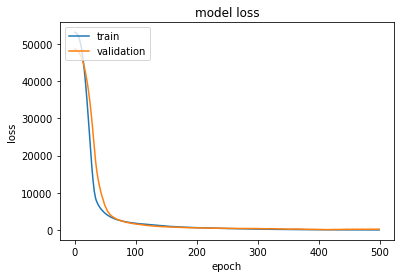

In [ ]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

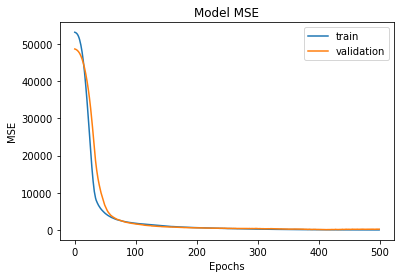

In [ ]:
# Menampilkan plot akurasi dari model
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
#model.load_weights('weight_model.h5')
predictions = model.predict(X_test)
y_pred2 = np.minimum(360., np.maximum(0, model.predict(X_test)))

In [ ]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, predictions, squared=False)
rmse2 = mean_squared_error(y_test, y_pred2, squared=False)

print(rmse)
print(rmse2)

16.479164682176233
16.440061767197825


In [ ]:
predictions = predictions.tolist()
predictions = pd.Series(predictions)
predictions = predictions.explode()
print(predictions)

y_pred2 = y_pred2.tolist()
y_pred2 = pd.Series(y_pred2)
y_pred2 = y_pred2.explode()
print(y_pred2)

0     293.267
1     64.0252
2     1.62291
3     228.155
4     233.217
5     193.296
6     229.242
7     291.767
8     292.842
9     56.6261
10    229.589
11    338.635
12     230.91
13    295.081
14    1.62291
15    337.441
16    230.766
17    362.849
18    294.257
19    341.603
20    197.061
21    234.085
22    235.936
23    228.422
24    230.448
25    231.108
26     198.28
27    1.62291
28    233.181
29    1.62291
30     300.23
31    343.434
32     227.08
33    231.595
34    230.826
35    1.62291
dtype: object
0     293.267
1     64.0252
2     1.62291
3     228.155
4     233.217
5     193.296
6     229.242
7     291.767
8     292.842
9     56.6261
10    229.589
11    338.635
12     230.91
13    295.081
14    1.62291
15    337.441
16    230.766
17        360
18    294.257
19    341.603
20    197.061
21    234.085
22    235.936
23    228.422
24    230.448
25    231.108
26     198.28
27    1.62291
28    233.181
29    1.62291
30     300.23
31    343.434
32     227.08
33    231.595
34    

In [ ]:
y_test = y_test.reset_index(drop=True)
compare = pd.DataFrame({'hue' : y_test, 'pred' : predictions})
compare2 = pd.DataFrame({'hue' : y_test, 'pred' : y_pred2})
#compare = pd.DataFrame(y_test, y_pred, axis=1)

print(compare)
print(compare2)

           hue     pred
0   290.000000  293.267
1   122.535211  64.0252
2     0.000000  1.62291
3   240.000000  228.155
4   225.882353  233.217
5   193.176471  193.296
6   240.000000  229.242
7   290.000000  291.767
8   290.000000  292.842
9   122.535211  56.6261
10  240.000000  229.589
11  353.291925  338.635
12  240.000000   230.91
13  290.000000  295.081
14    0.000000  1.62291
15  349.940120  337.441
16  240.000000  230.766
17  353.291925  362.849
18  290.000000  294.257
19  349.940120  341.603
20  193.176471  197.061
21  225.882353  234.085
22  225.882353  235.936
23  240.000000  228.422
24  240.000000  230.448
25  225.882353  231.108
26  193.176471   198.28
27    0.000000  1.62291
28  240.000000  233.181
29    0.000000  1.62291
30  290.000000   300.23
31  349.940120  343.434
32  225.882353   227.08
33  240.000000  231.595
34  240.000000  230.826
35    0.000000  1.62291
           hue     pred
0   290.000000  293.267
1   122.535211  64.0252
2     0.000000  1.62291
3   240.000000  

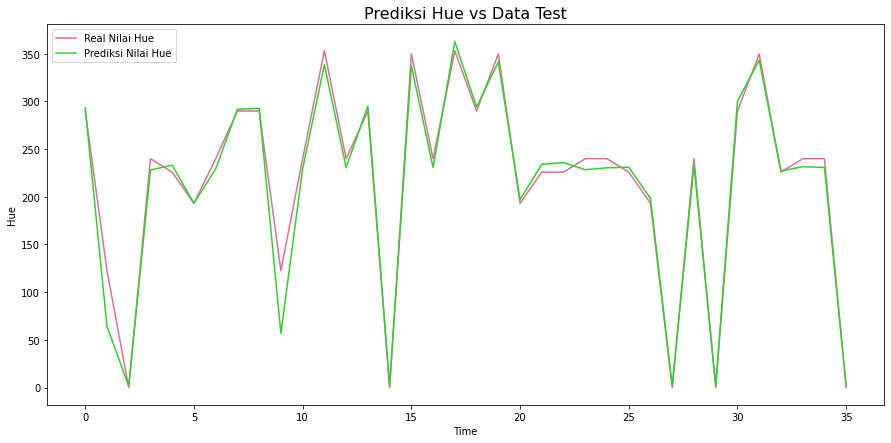

In [ ]:
# Membuat diagram garis untuk memperlihatkan ke akuratan hasil prediksi dan nilai real pada dataset
# Data prediksi vs data test

plt.figure(figsize=(15,7))
plt.plot(compare['hue'], color = 'palevioletred', label = 'Real Nilai Hue')
plt.plot(compare['pred'], color = 'limegreen', label = 'Prediksi Nilai Hue')
plt.title('Prediksi Hue vs Data Test',fontsize = 16)
plt.xlabel('Time')
plt.ylabel('Hue')
plt.legend()
plt.show()

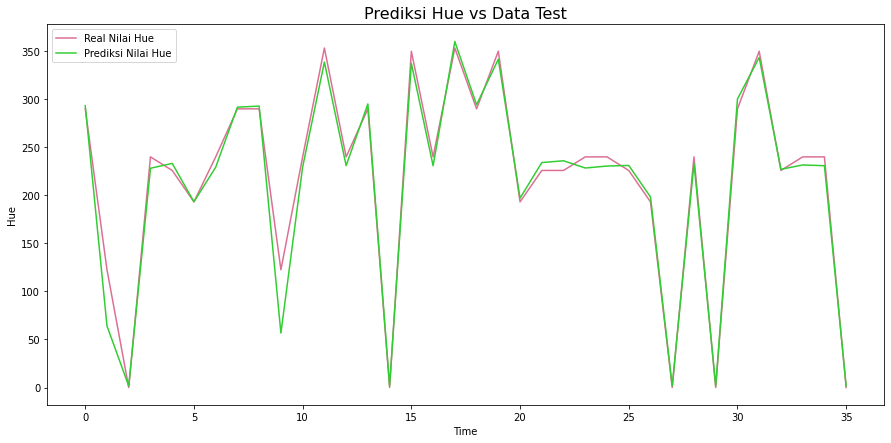

In [ ]:
# Membuat diagram garis untuk memperlihatkan ke akuratan hasil prediksi dan nilai real pada dataset
# Data prediksi vs data test

plt.figure(figsize=(15,7))
plt.plot(compare2['hue'], color = 'palevioletred', label = 'Real Nilai Hue')
plt.plot(compare2['pred'], color = 'limegreen', label = 'Prediksi Nilai Hue')
plt.title('Prediksi Hue vs Data Test',fontsize = 16)
plt.xlabel('Time')
plt.ylabel('Hue')
plt.legend()
plt.show()

In [ ]:
X_test1 = X_test1.reset_index(drop=True)
df2 = [X_test1, compare2]

df3 = pd.concat(df2, axis=1)
df3.rename(columns={'brightness': 'value'}, inplace=True)
df3.head(2)

,saturation,value,minggu ke,Total PO Order Qty,Year,Month,Season,range_warna,hue,pred
0,9.836066,23.921569,1,7000,2020,6,2,9,290.000000,293.267
1,35.678392,78.039216,2,1613,2020,6,2,5,122.535211,64.0252


In [ ]:
df3['saturation'] = df3['saturation'].div(100).round(2)
df3['value'] = df3['value'].div(100).round(2)

In [ ]:
plot1 = df3[['hue', 'saturation','value']]
plot2 = df3[['pred', 'saturation','value']]
plot2.rename(columns={'pred': 'pred_hue'}, inplace=True)

In [ ]:
print(plot2.head(2))
print(plot1.head(2))

  pred_hue  saturation  value
0  293.267        0.10   0.24
1  64.0252        0.36   0.78
          hue  saturation  value
0  290.000000        0.10   0.24
1  122.535211        0.36   0.78


In [ ]:
plot1['hsv'] = [', '.join(str(x) for x in y) for y in map(tuple, plot1[['hue', 'saturation', 'value']].values)]
plot2['hsv'] = [', '.join(str(x) for x in y) for y in map(tuple, plot2[['pred_hue', 'saturation', 'value']].values)]
print(plot1.head(2))
print(plot2.head(2))

          hue  saturation  value                            hsv
0  290.000000        0.10   0.24   289.9999999999999, 0.1, 0.24
1  122.535211        0.36   0.78  122.5352112676056, 0.36, 0.78
  pred_hue  saturation  value                            hsv
0  293.267        0.10   0.24  293.26666259765625, 0.1, 0.24
1  64.0252        0.36   0.78  64.02520751953125, 0.36, 0.78


In [ ]:
decimals = 2    
plot1['hue'] = plot1['hue'].apply(lambda x: round(x, decimals))
plot1['saturation'] = plot1['saturation'].apply(lambda x: round(x, decimals))
plot1['value'] = plot1['value'].apply(lambda x: round(x, decimals))

plot2['hue'] = plot2['pred_hue'].apply(lambda x: round(x, decimals))
plot2['saturation'] = plot2['saturation'].apply(lambda x: round(x, decimals))
plot2['value'] = plot2['value'].apply(lambda x: round(x, decimals))

In [ ]:
print(plot1.head(2))
print(plot2.head(2))

      hue  saturation  value                            hsv
0  290.00        0.10   0.24   289.9999999999999, 0.1, 0.24
1  122.54        0.36   0.78  122.5352112676056, 0.36, 0.78
  pred_hue  saturation  value                            hsv     hue
0  293.267        0.10   0.24  293.26666259765625, 0.1, 0.24  293.27
1  64.0252        0.36   0.78  64.02520751953125, 0.36, 0.78   64.03


In [ ]:
def hsv_to_rgb(h, s, v):
    if s == 0.0: v*=255; return (v, v, v)
    i = int(h*6.) # XXX assume int() truncates!
    f = (h*6.)-i; p,q,t = int(255*(v*(1.-s))), int(255*(v*(1.-s*f))), int(255*(v*(1.-s*(1.-f)))); v*=255; i%=6
    if i == 0: return (v, t, p)
    if i == 1: return (q, v, p)
    if i == 2: return (p, v, t)
    if i == 3: return (p, q, v)
    if i == 4: return (t, p, v)
    if i == 5: return (v, p, q)

import colorsys
def hsv2rgb(h,s,v):
    return tuple(round(i * 255) for i in colorsys.hsv_to_rgb(h,s,v))

In [212]:
h = plot1['hue'][0]
s= plot1['saturation'][0]
v= plot1['value'][0]
print(h)
print(s)
print(v)
print(hsv_to_rgb(h, s, v))
print(hsv2rgb(0, 0, 0.69))
print(hsv_to_rgb(0,0,0.69))

290.0
0.1
0.24
(61.199999999999996, 55, 55)
(176, 176, 176)
(175.95, 175.95, 175.95)


In [ ]:
real_rgb = []
for z in range (len(plot1)) :
    h = plot1['hue'][z]
    s = plot1['saturation'][z]
    v = plot1['value'][z]
    #print(x)
    rgb_cols = hsv2rgb(h, s, v)
    real_rgb.append(rgb_cols)

print(len(real_rgb))

pred_rgb = []
for zz in range (len(plot2)) :
    h = plot2['pred_hue'][zz]
    s = plot2['saturation'][zz]
    v = plot2['value'][zz]
    #print(x)
    rgb_cols = hsv2rgb(h, s, v)
    pred_rgb.append(rgb_cols)
print(len(pred_rgb))

36
36


In [ ]:
real_rgb

[(61, 55, 55),
 (127, 182, 199),
 (176, 176, 176),
 (128, 0, 0),
 (92, 24, 73),
 (235, 255, 0),
 (128, 0, 0),
 (61, 55, 55),
 (61, 55, 55),
 (127, 182, 199),
 (128, 0, 0),
 (44, 163, 2),
 (128, 0, 0),
 (61, 55, 55),
 (176, 176, 176),
 (176, 11, 70),
 (128, 0, 0),
 (44, 163, 2),
 (61, 55, 55),
 (176, 11, 70),
 (235, 255, 0),
 (92, 24, 73),
 (92, 24, 73),
 (128, 0, 0),
 (128, 0, 0),
 (92, 24, 73),
 (235, 255, 0),
 (252, 252, 252),
 (128, 0, 0),
 (252, 252, 252),
 (61, 55, 55),
 (176, 11, 70),
 (92, 24, 73),
 (128, 0, 0),
 (128, 0, 0),
 (252, 252, 252)]

In [ ]:
pred_rgb

[(58, 61, 55),
 (199, 138, 127),
 (176, 176, 176),
 (128, 118, 0),
 (71, 92, 24),
 (58, 255, 0),
 (69, 128, 0),
 (59, 55, 61),
 (61, 55, 61),
 (127, 145, 199),
 (0, 60, 128),
 (2, 32, 163),
 (128, 0, 69),
 (61, 58, 55),
 (176, 176, 176),
 (11, 176, 117),
 (76, 0, 128),
 (163, 2, 2),
 (58, 61, 55),
 (11, 73, 176),
 (255, 94, 0),
 (92, 58, 24),
 (92, 24, 50),
 (0, 128, 68),
 (0, 128, 87),
 (92, 68, 24),
 (81, 255, 0),
 (252, 252, 252),
 (117, 128, 0),
 (252, 252, 252),
 (59, 61, 55),
 (11, 176, 111),
 (92, 57, 24),
 (0, 55, 128),
 (122, 0, 128),
 (252, 252, 252)]

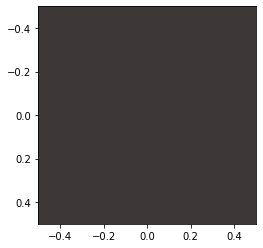

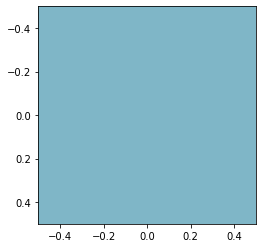

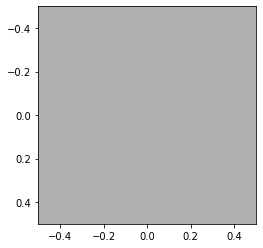

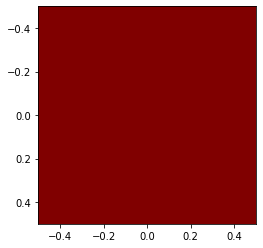

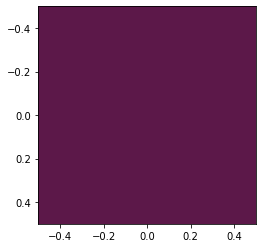

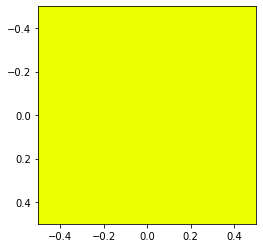

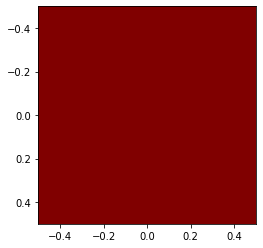

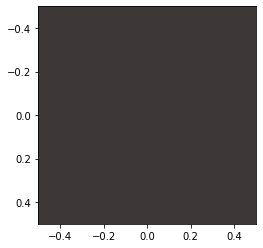

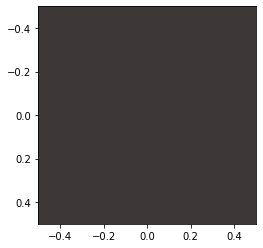

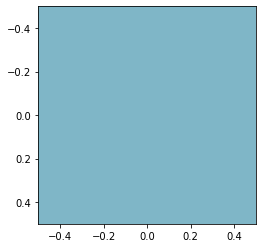

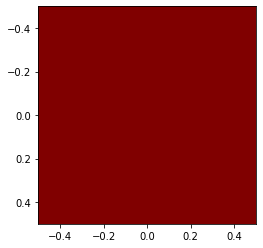

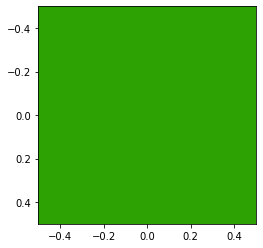

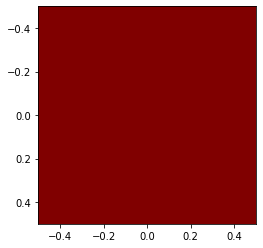

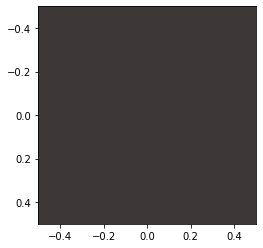

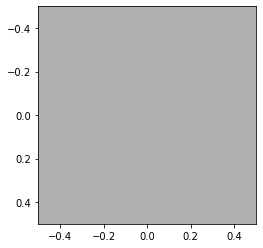

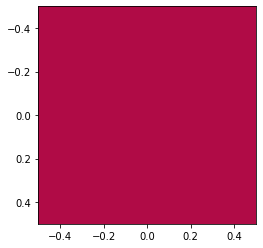

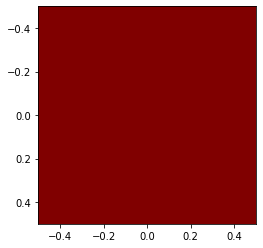

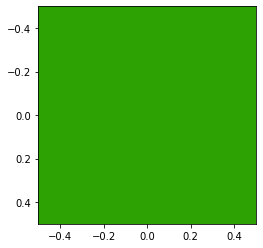

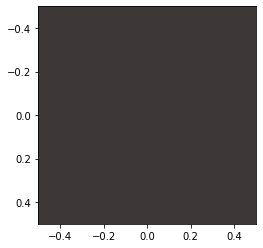

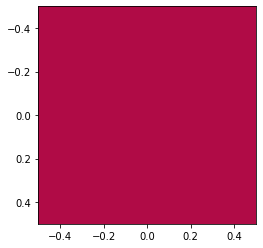

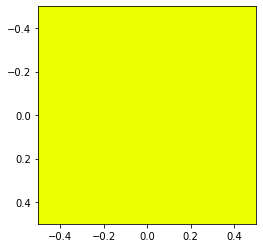

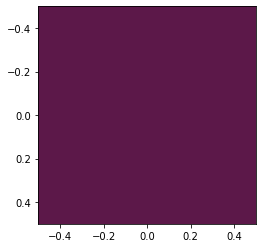

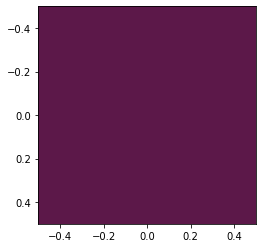

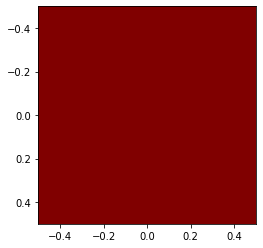

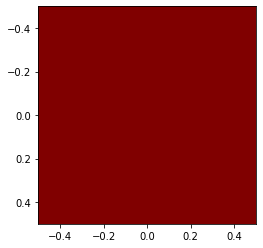

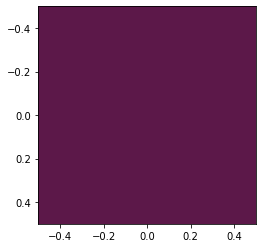

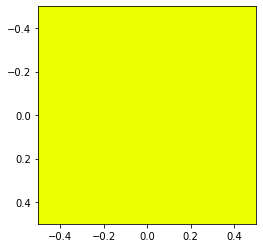

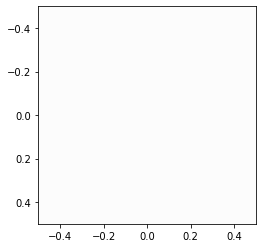

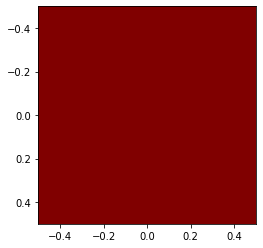

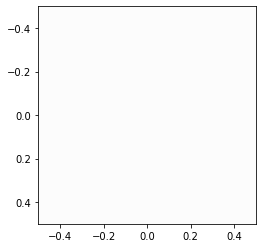

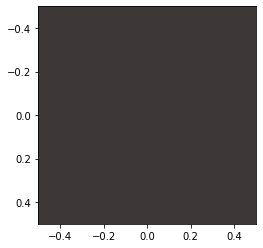

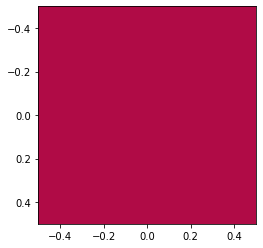

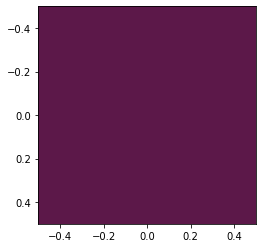

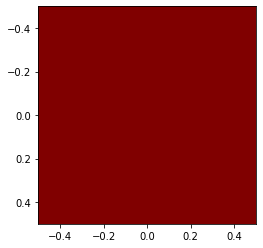

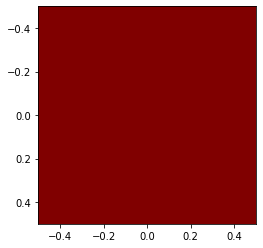

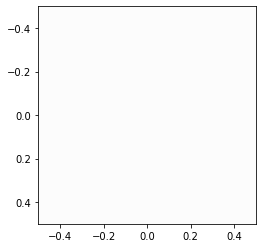

In [ ]:
# real warna
for i in range(len(real_rgb)):
    plt.figure()
    #print([[real_rgb[i]]])
    plt.imshow([[real_rgb[i]]])
    plt.savefig("/content/drive/MyDrive/warna_pred_real/real/real_color" + str(i) +".png", format="PNG")
    # Show/save figure as desired.
    plt.show()

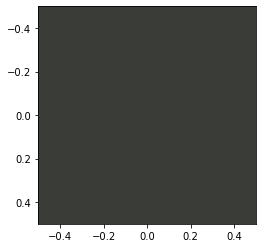

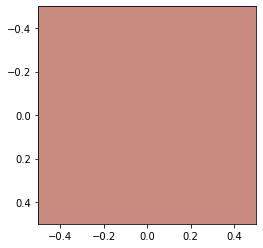

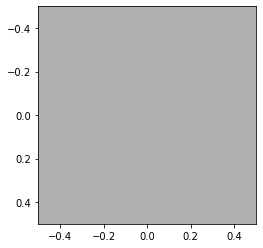

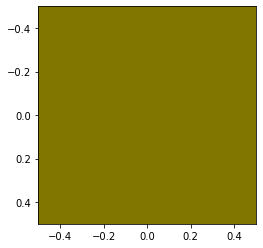

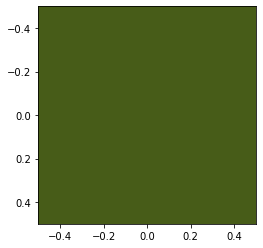

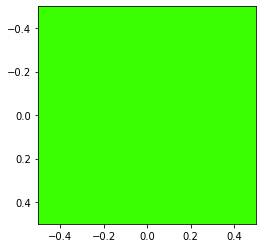

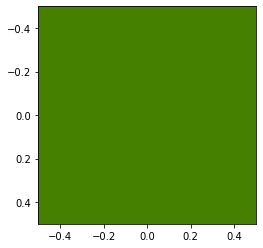

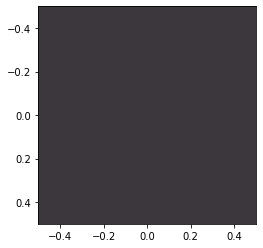

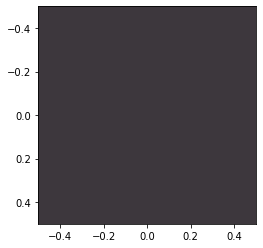

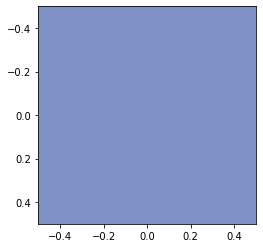

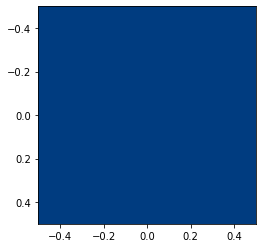

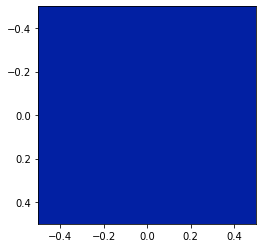

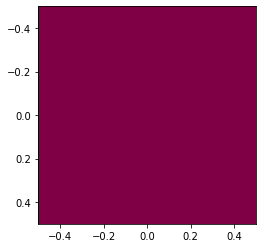

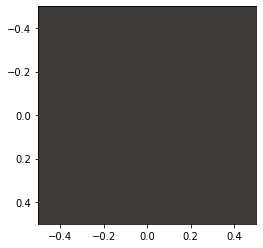

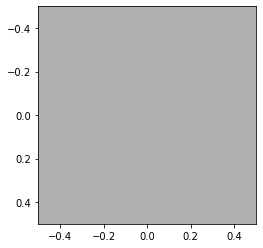

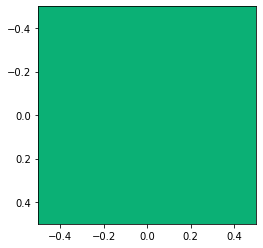

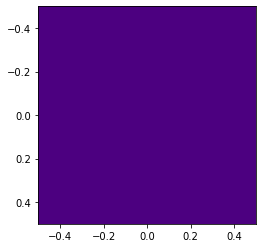

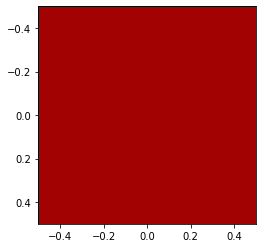

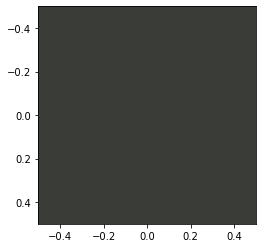

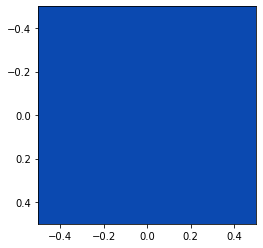

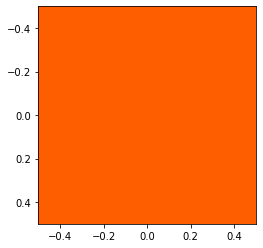

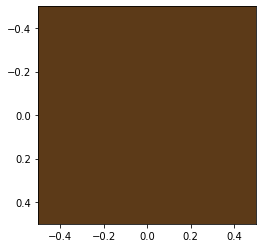

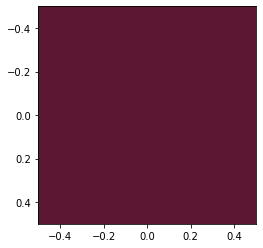

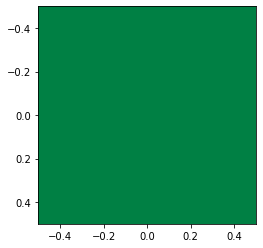

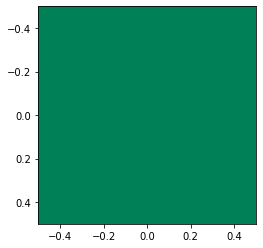

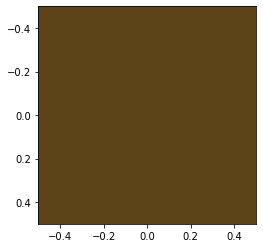

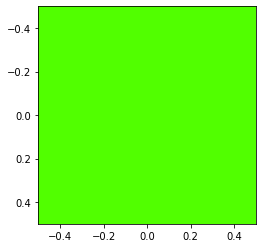

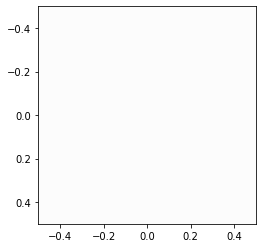

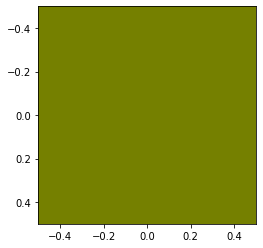

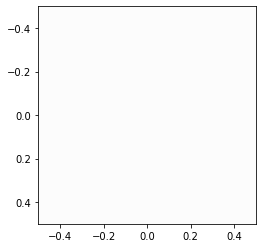

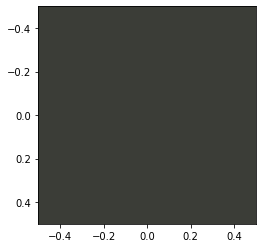

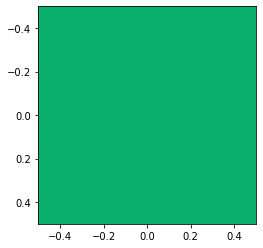

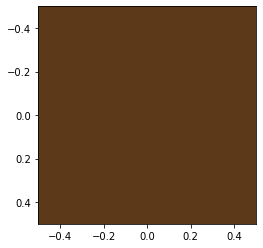

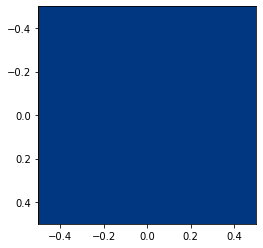

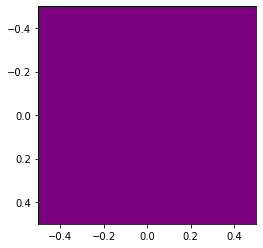

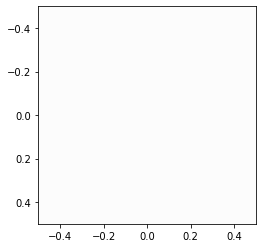

In [ ]:
# pred warna
for i in range(len(pred_rgb)):
    plt.figure()
    #print([[pred_rgb[i]]])
    plt.imshow([[pred_rgb[i]]])
    plt.savefig("/content/drive/MyDrive/warna_pred_real/pred/pred_color" + str(i) +".png", format="PNG")
    # Show/save figure as desired.
    plt.show()

In [ ]:
plt.figure(figsize=(15, 40))
for i in range(1, 37):
    plt.subplot(36, 2, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

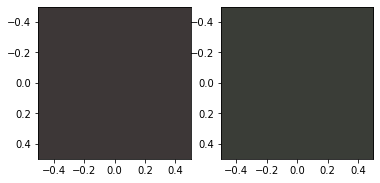

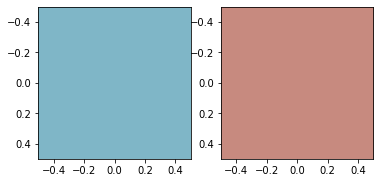

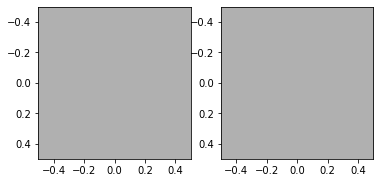

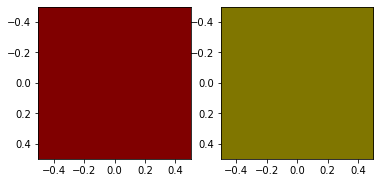

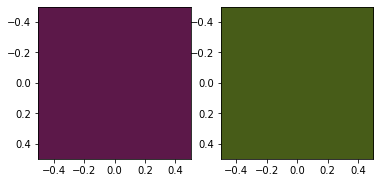

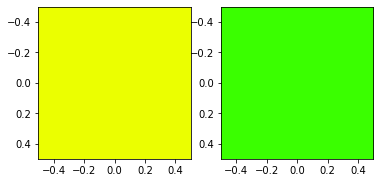

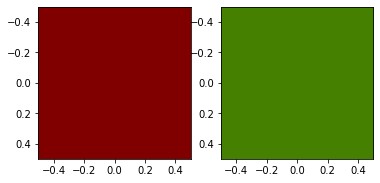

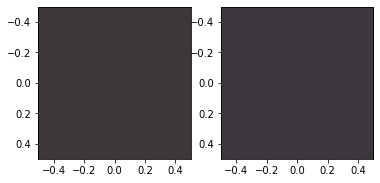

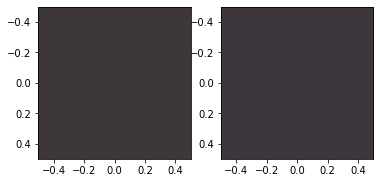

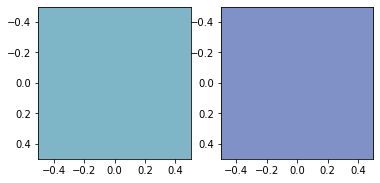

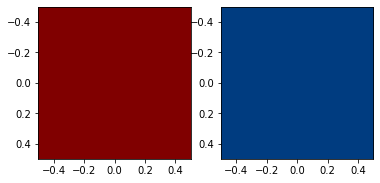

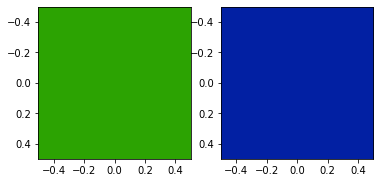

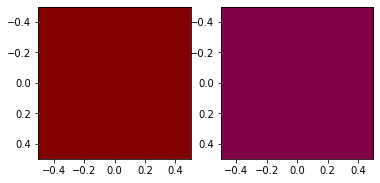

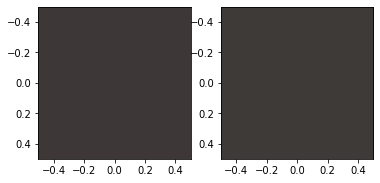

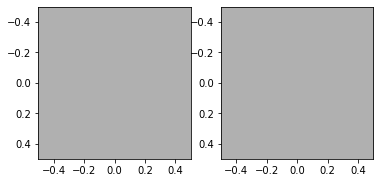

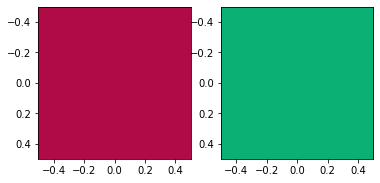

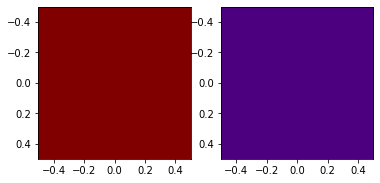

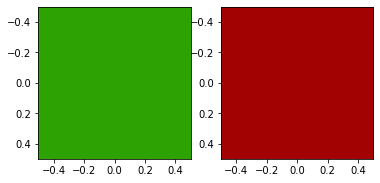

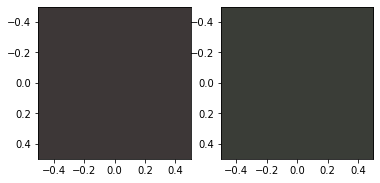

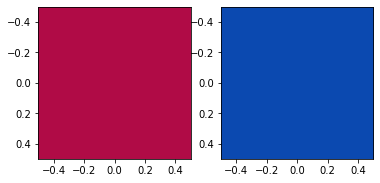

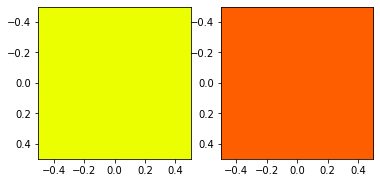

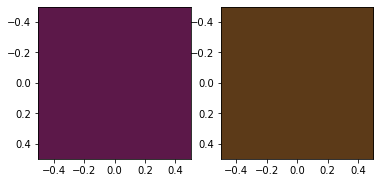

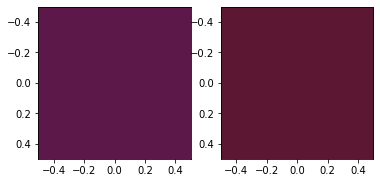

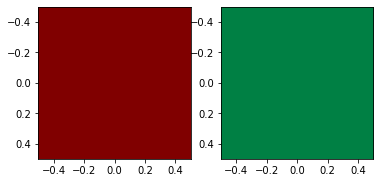

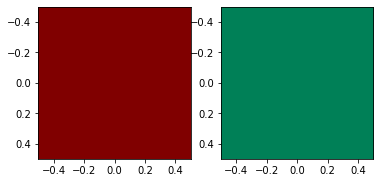

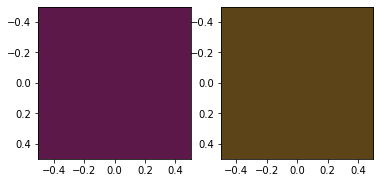

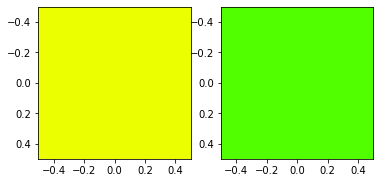

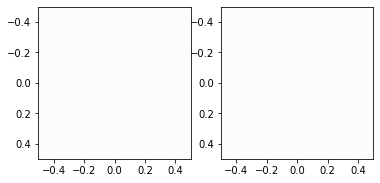

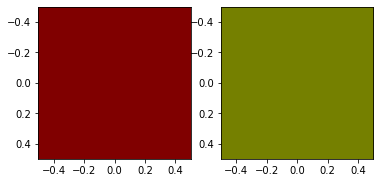

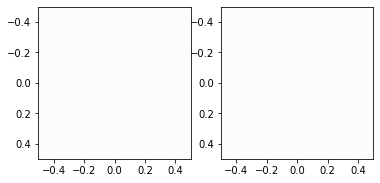

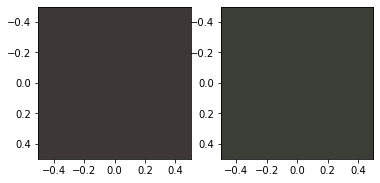

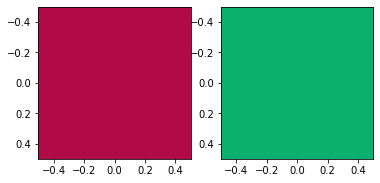

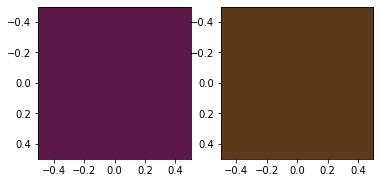

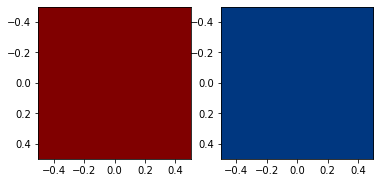

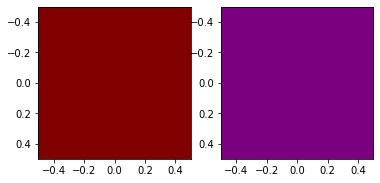

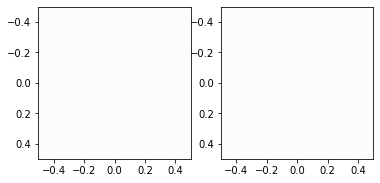

In [225]:
for i in range(len(real_rgb)):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow([[real_rgb[i]]])
    ax2.imshow([[pred_rgb[i]]])
    plt.show()

<Figure size 1080x2880 with 0 Axes>

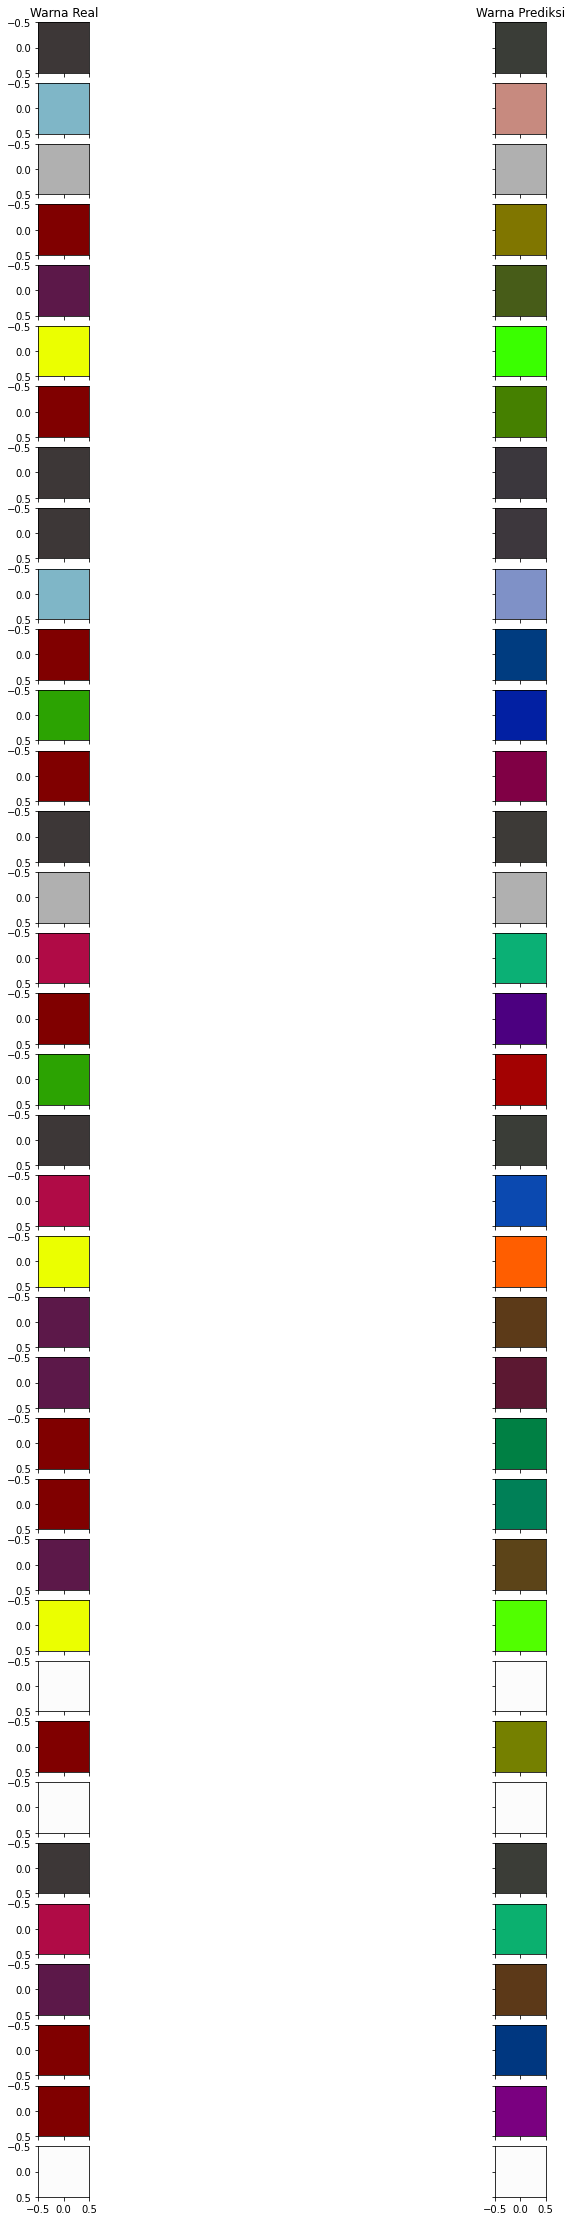

In [224]:
plt.figure(figsize=(15, 40))
fig, ax = plt.subplots(36, 2, sharex='col', sharey='row',figsize=(15, 40))
# axes are in a two-dimensional array, indexed by [row, col]
ax[0, 0].title.set_text('Warna Real')
ax[0, 1].title.set_text('Warna Prediksi')

for i in range(36):
    ax[i, 1].imshow([[pred_rgb[i]]])
    ax[i, 0].imshow([[real_rgb[i]]])


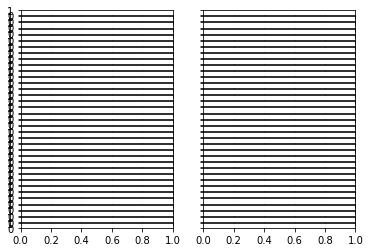

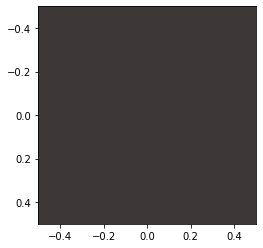

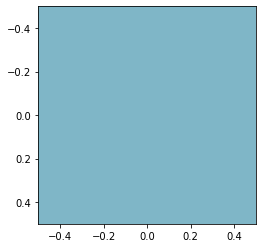

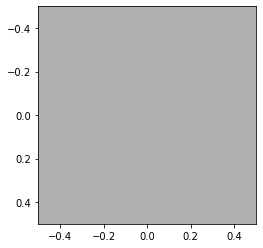

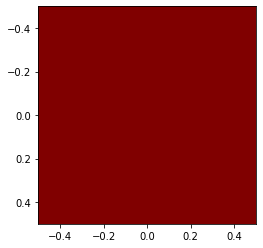

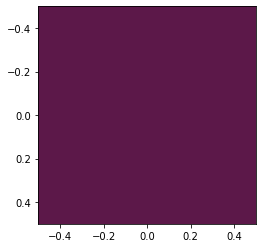

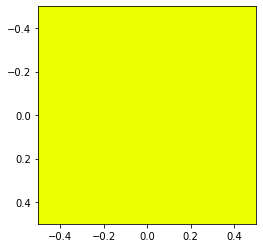

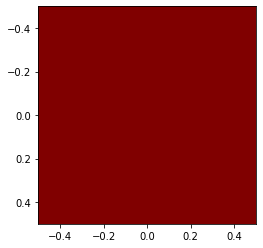

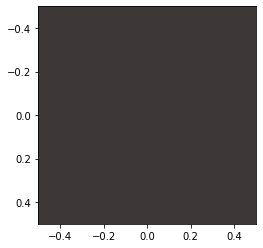

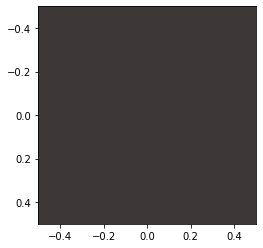

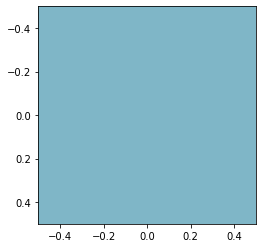

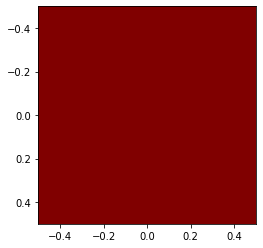

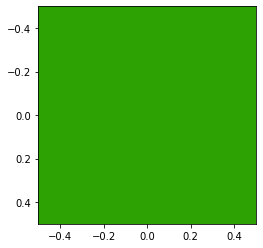

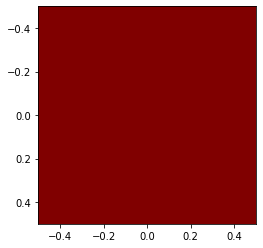

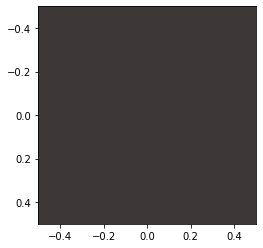

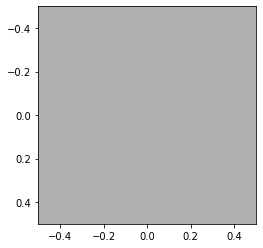

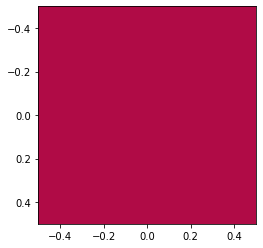

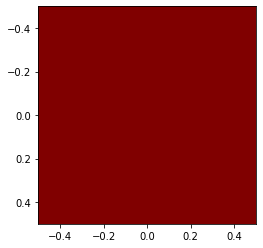

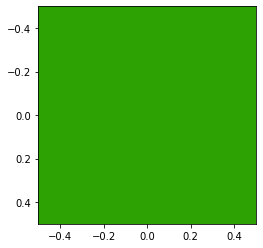

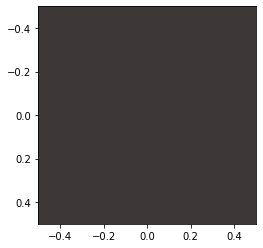

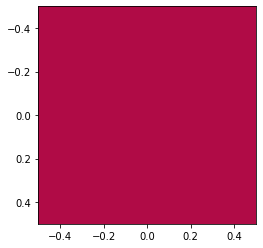

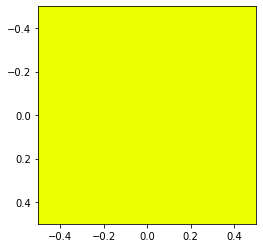

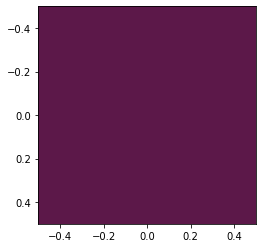

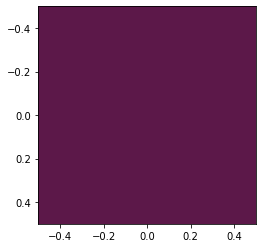

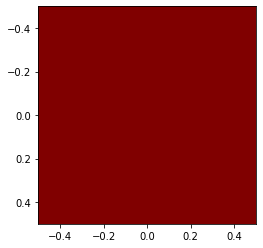

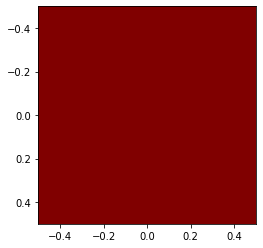

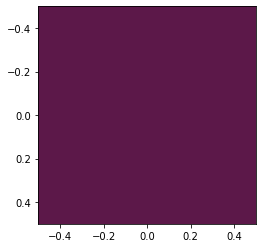

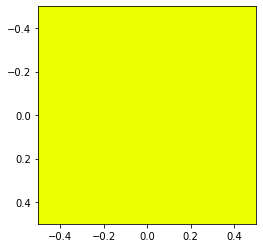

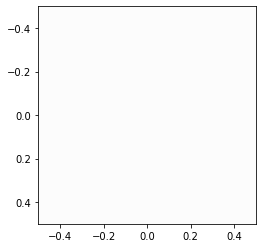

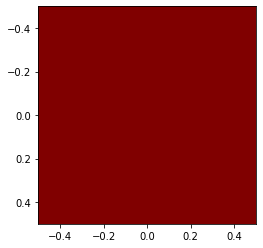

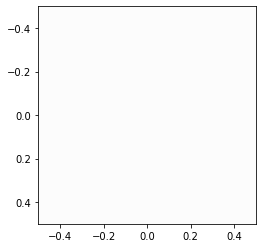

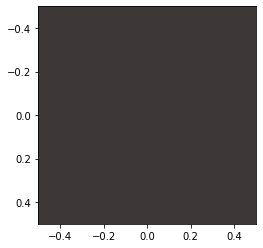

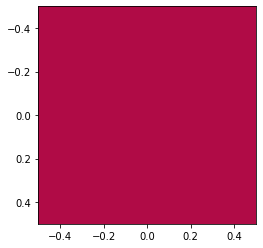

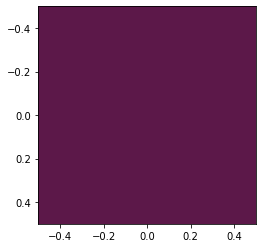

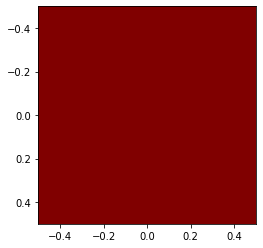

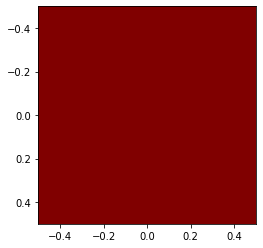

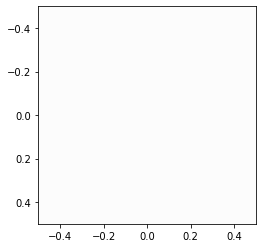

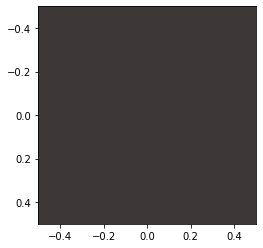

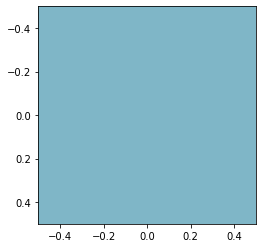

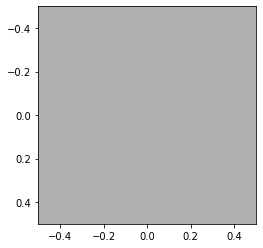

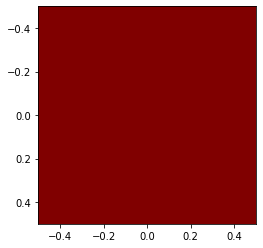

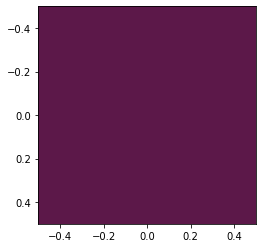

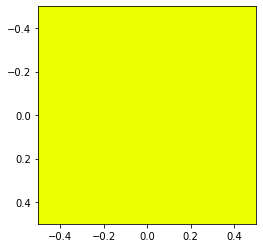

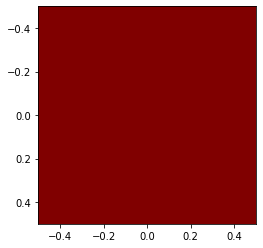

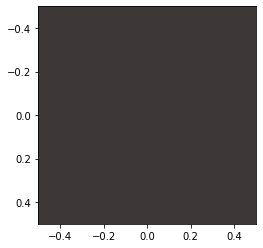

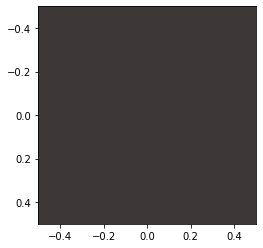

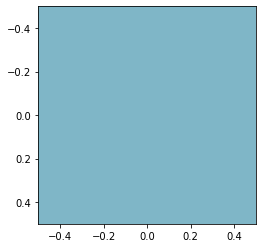

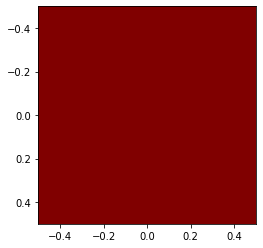

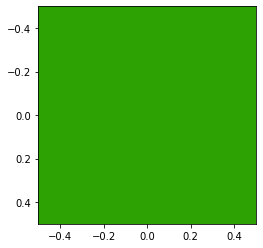

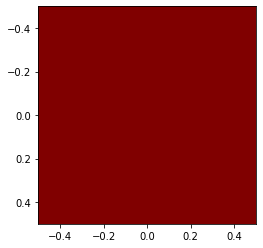

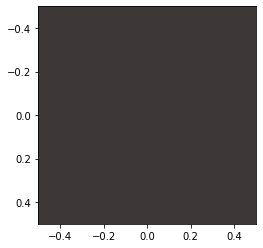

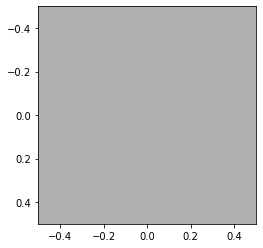

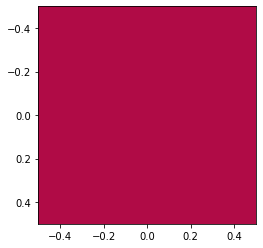

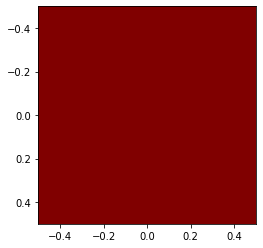

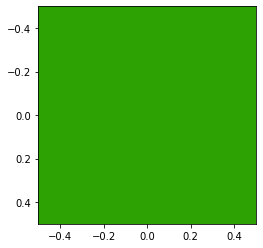

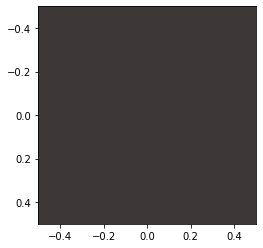

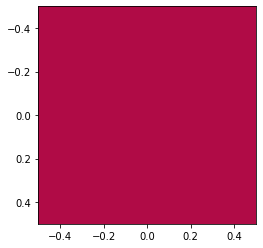

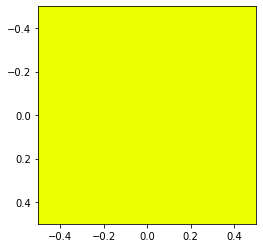

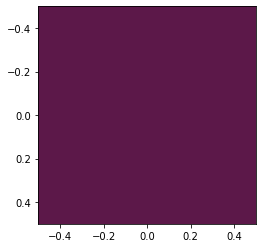

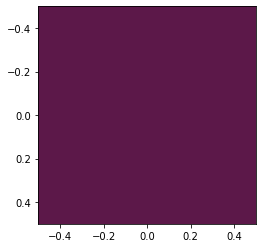

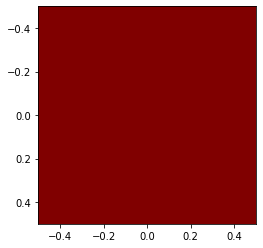

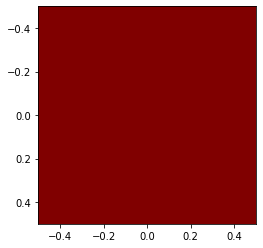

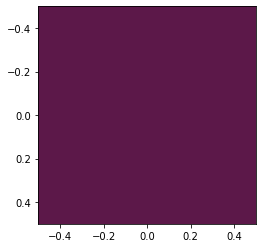

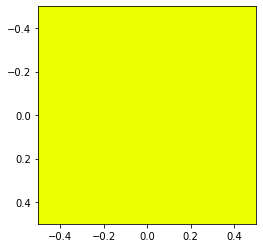

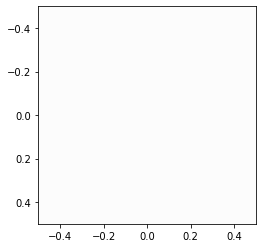

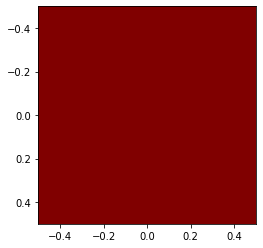

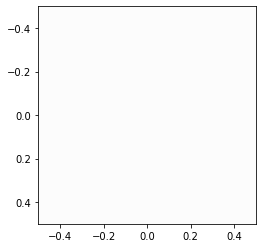

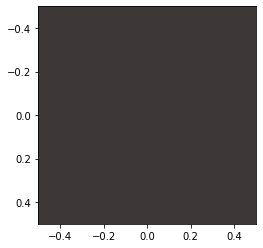

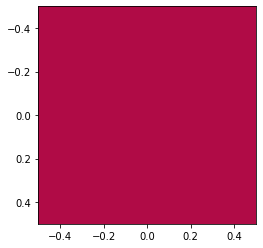

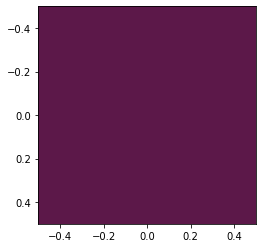

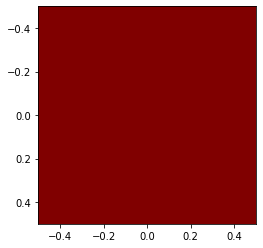

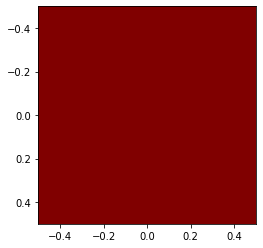

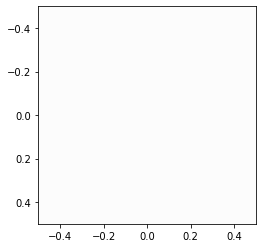

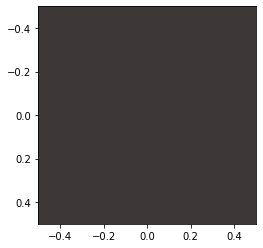

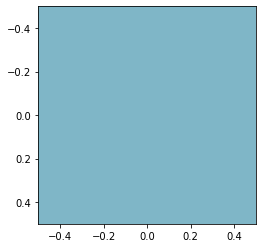

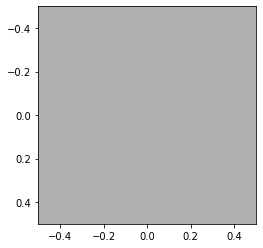

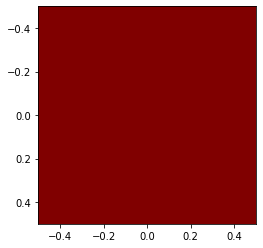

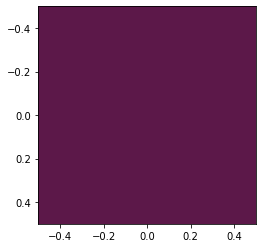

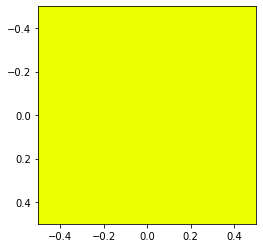

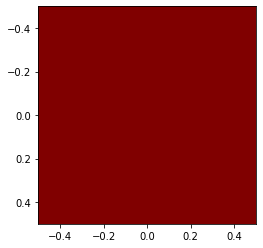

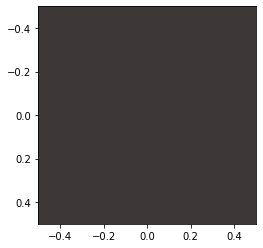

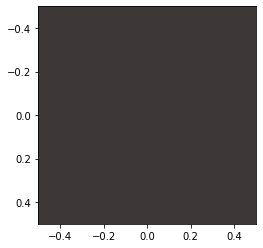

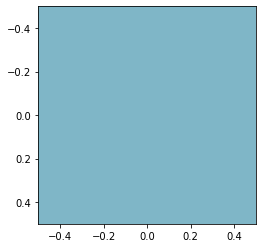

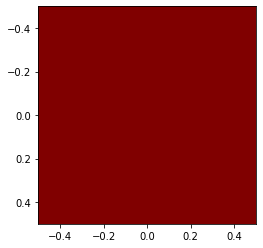

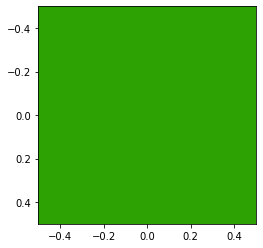

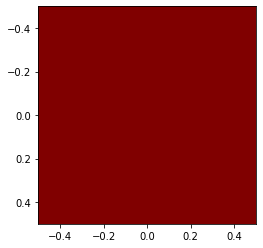

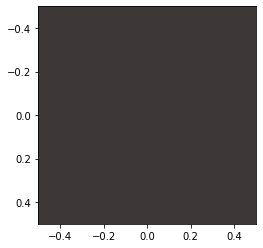

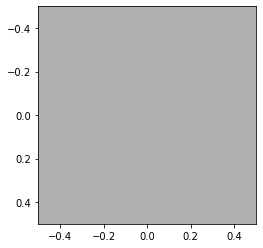

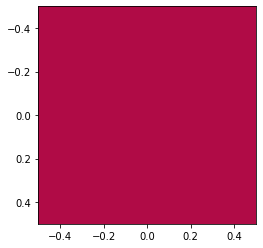

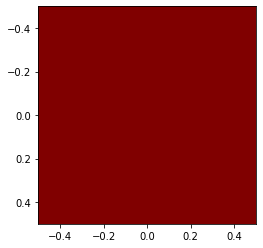

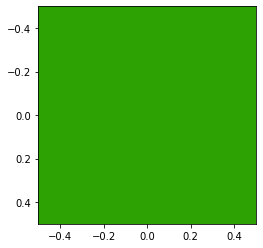

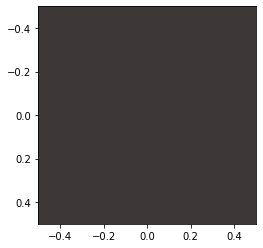

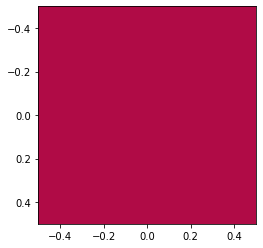

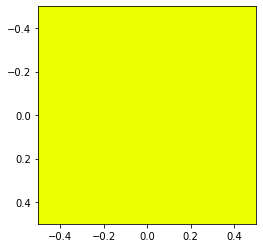

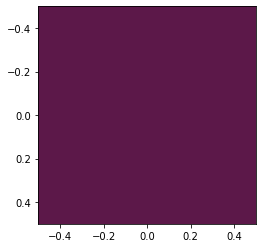

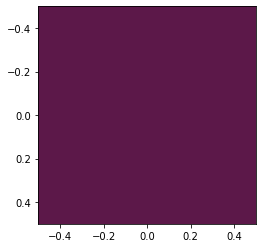

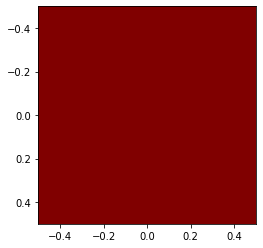

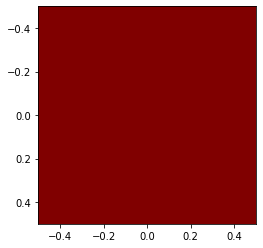

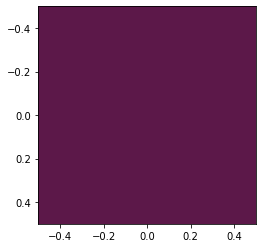

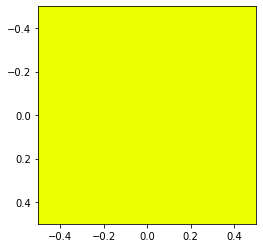

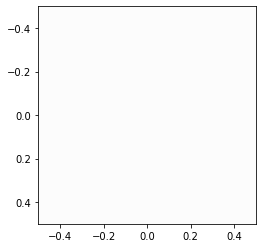

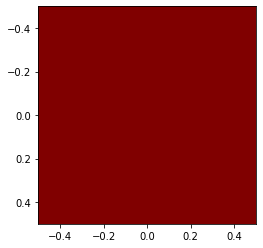

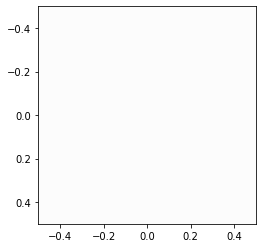

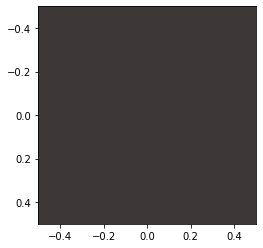

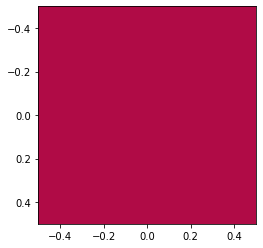

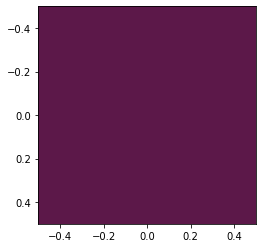

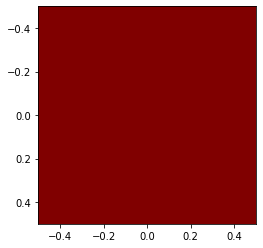

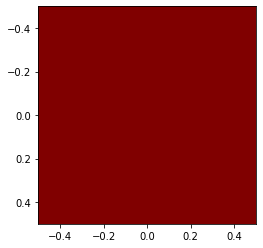

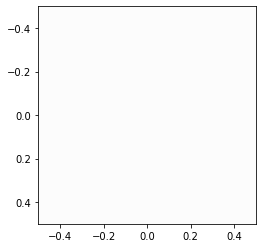

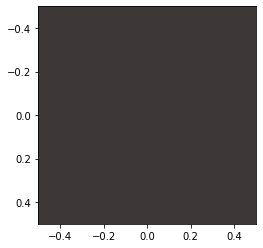

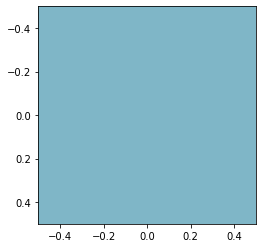

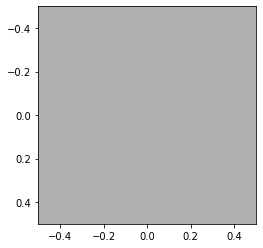

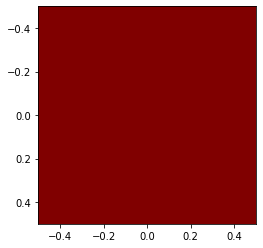

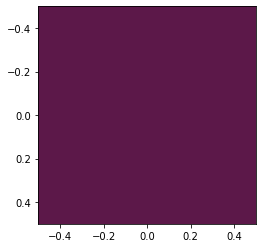

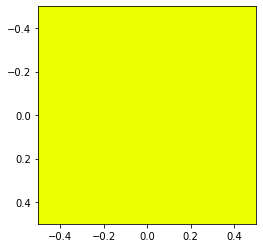

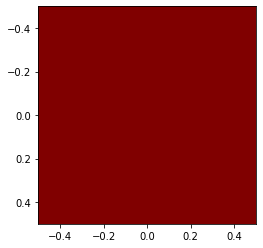

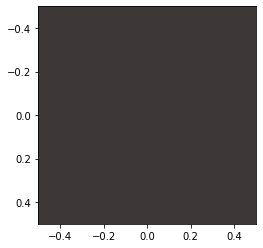

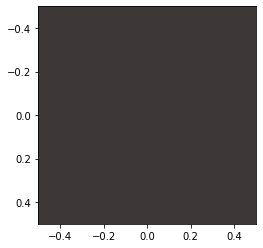

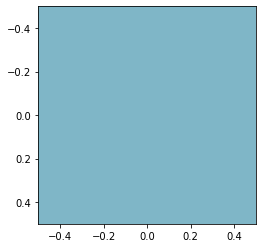

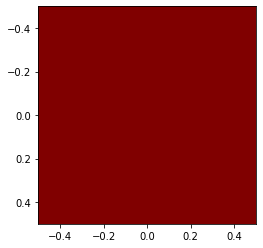

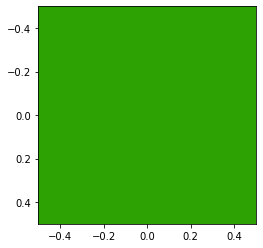

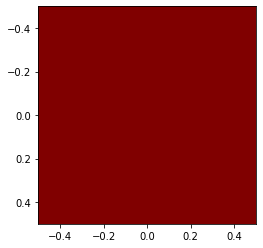

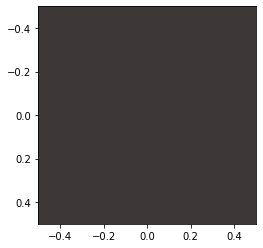

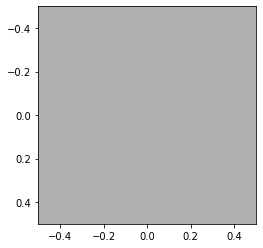

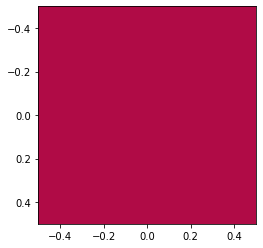

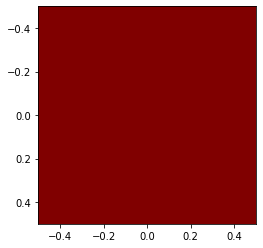

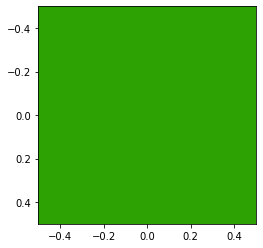

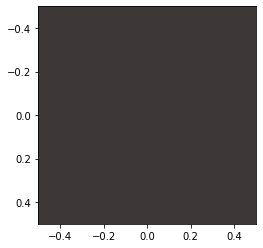

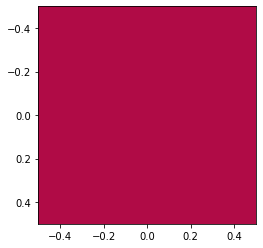

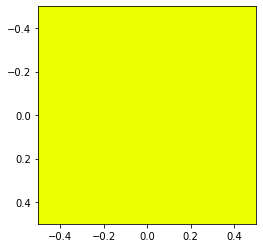

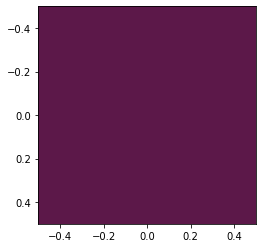

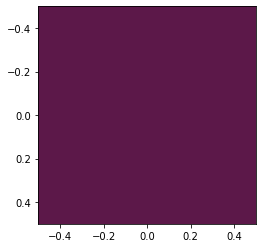

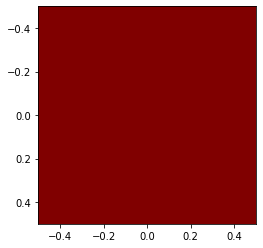

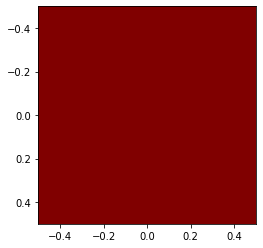

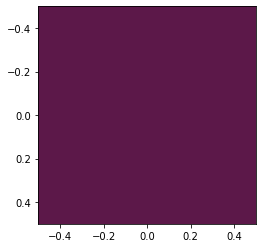

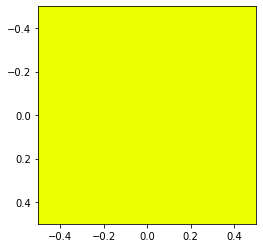

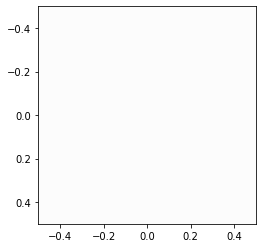

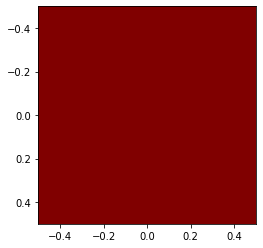

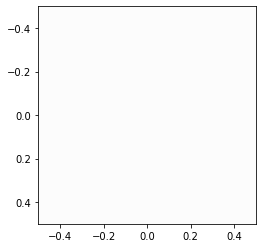

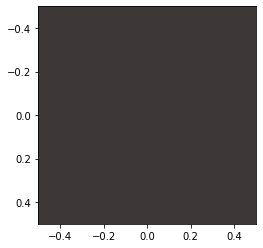

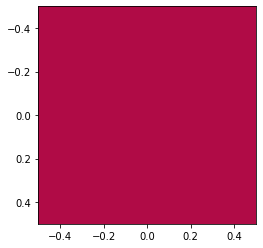

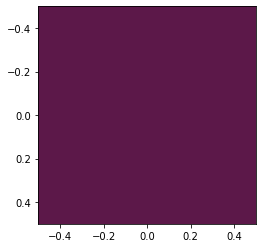

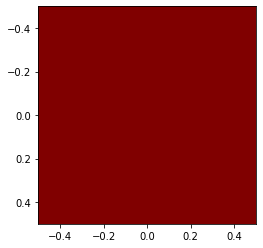

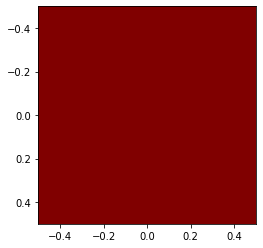

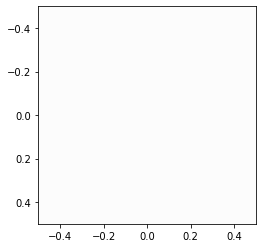

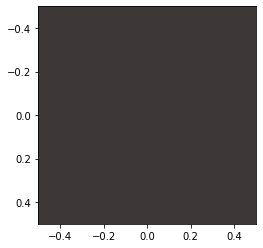

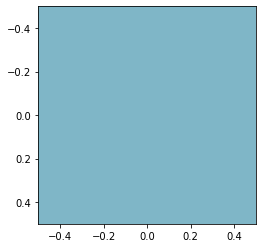

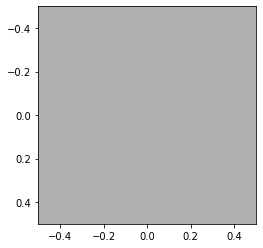

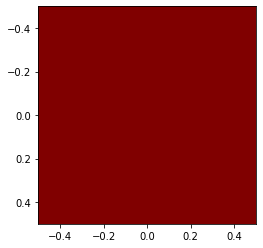

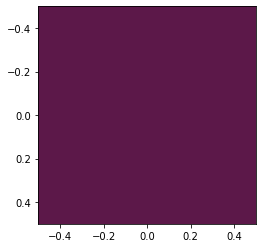

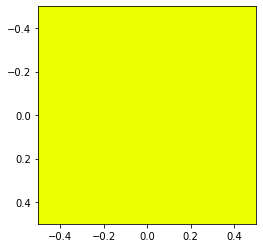

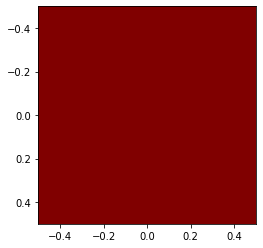

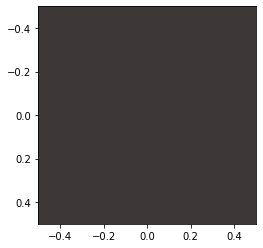

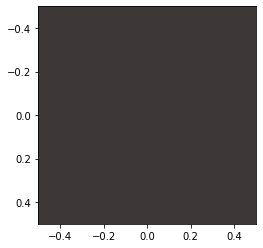

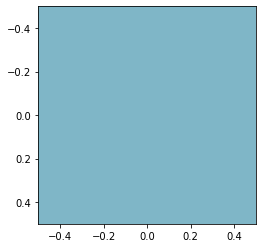

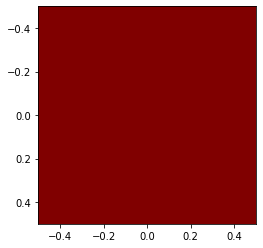

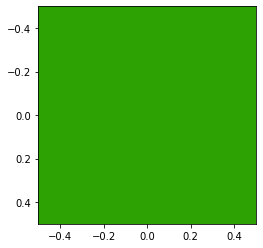

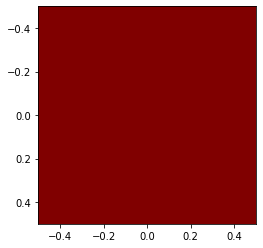

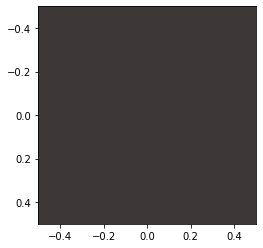

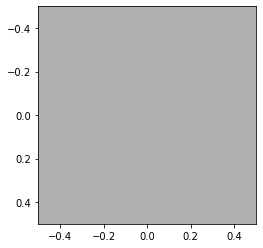

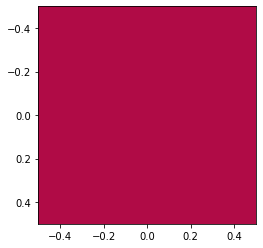

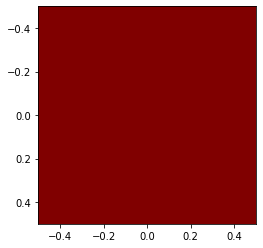

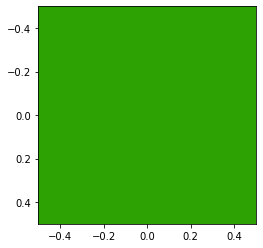

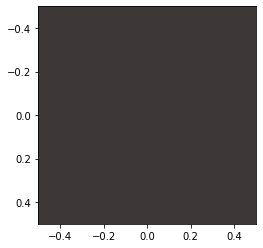

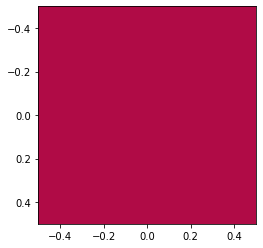

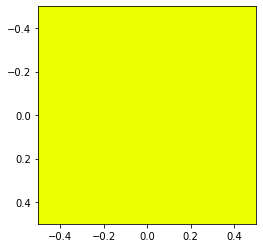

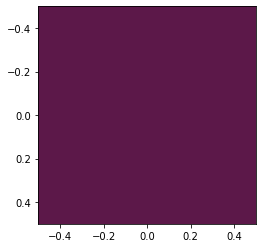

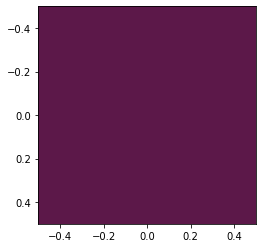

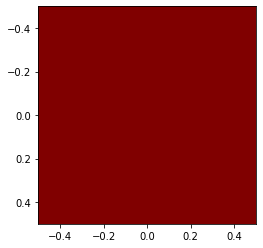

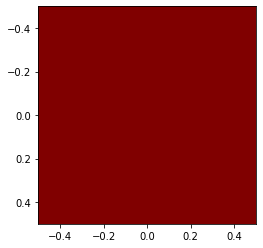

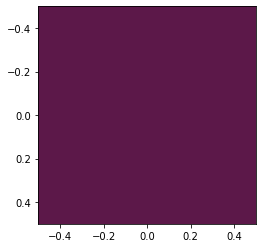

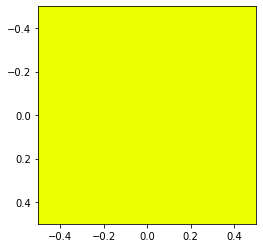

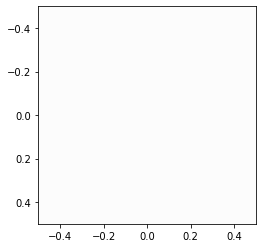

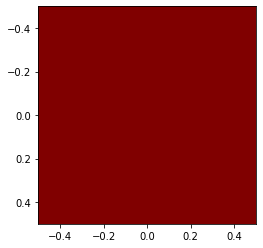

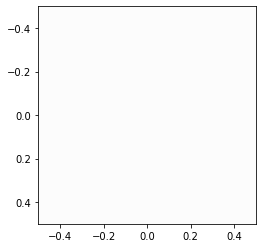

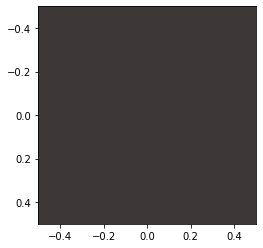

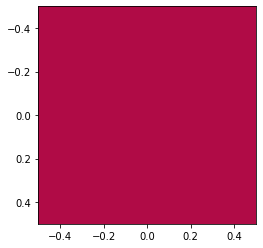

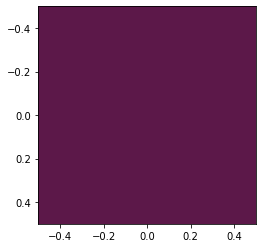

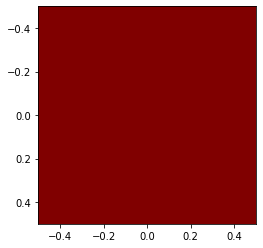

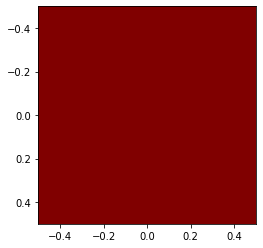

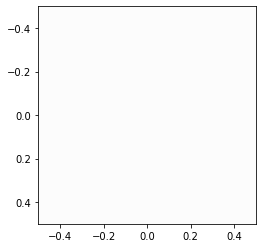

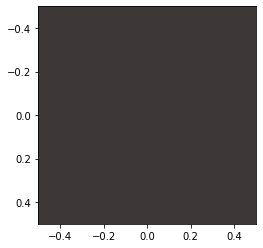

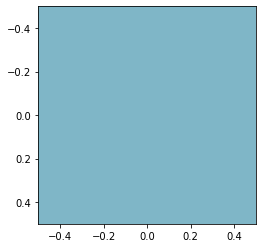

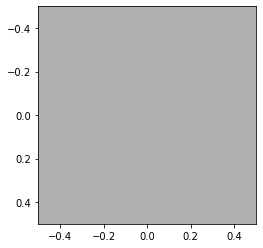

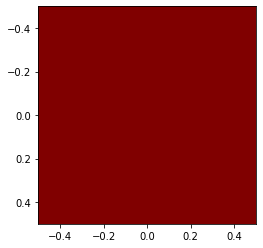

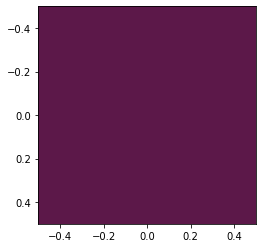

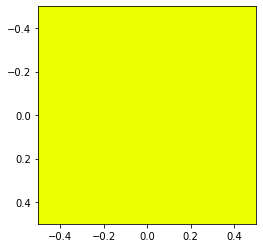

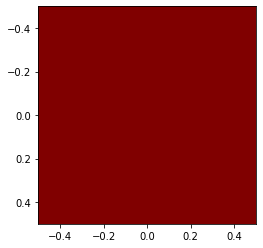

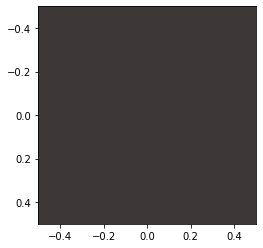

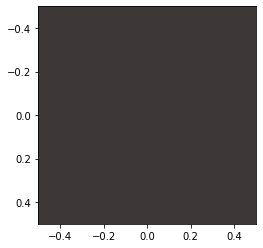

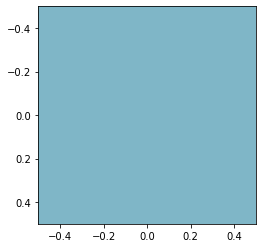

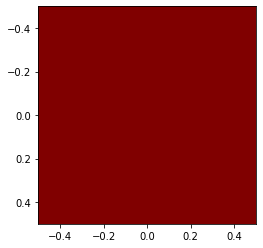

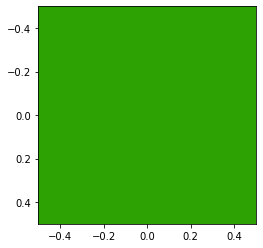

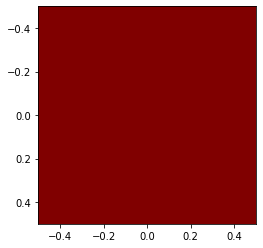

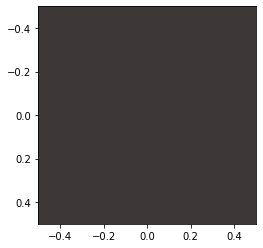

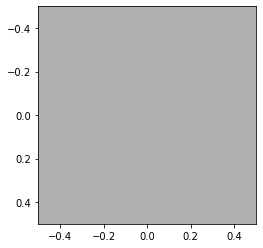

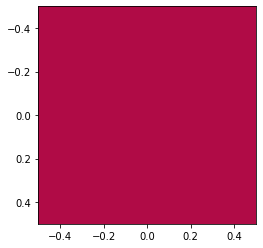

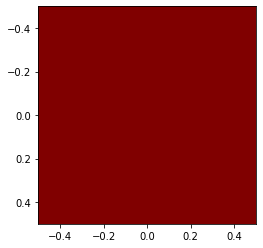

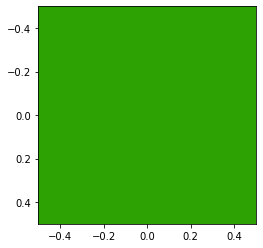

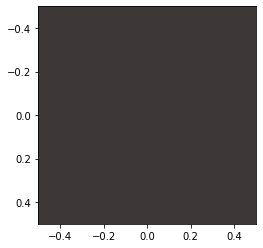

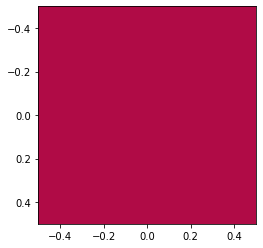

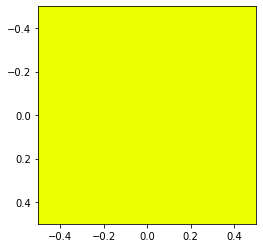

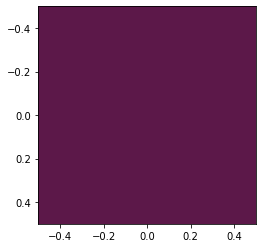

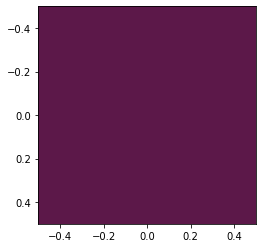

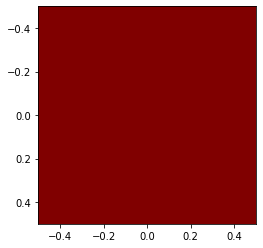

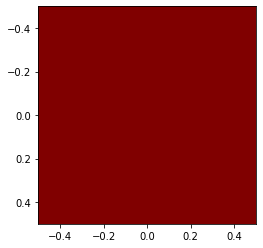

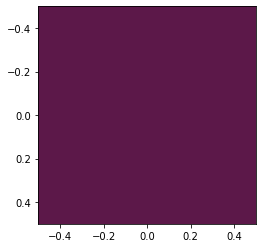

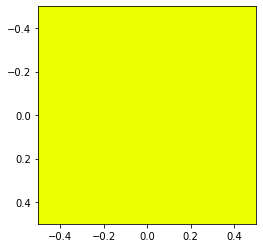

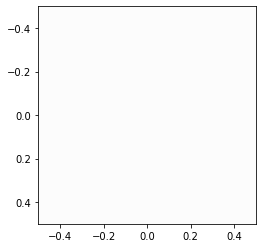

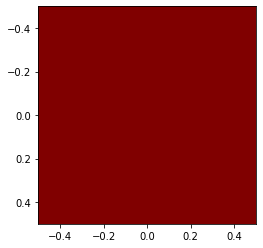

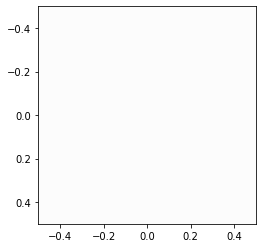

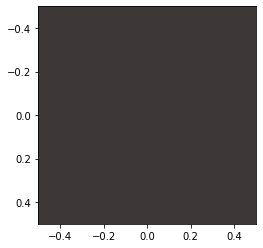

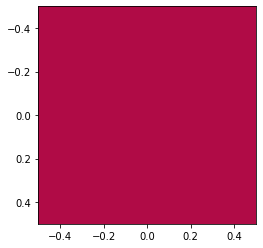

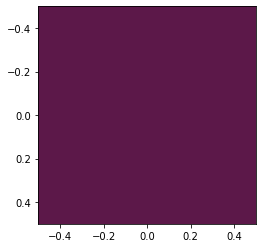

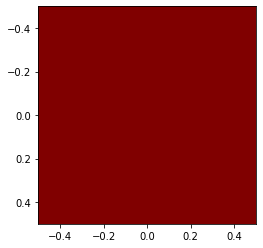

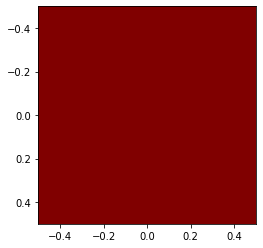

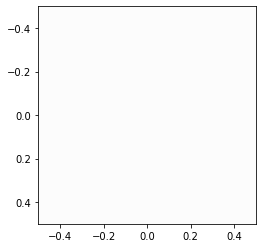

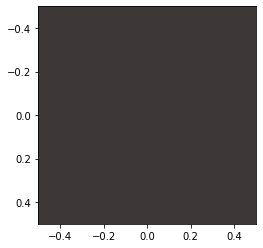

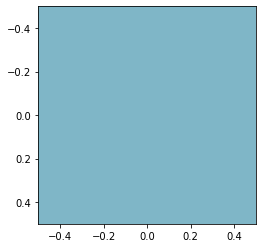

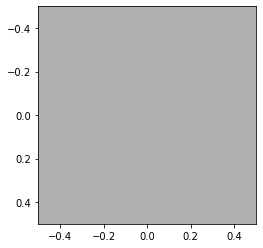

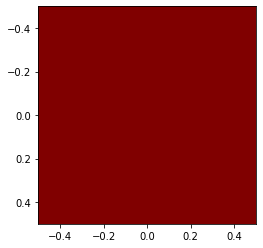

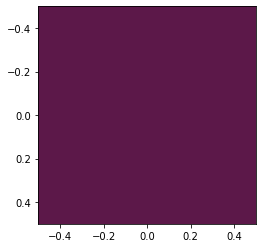

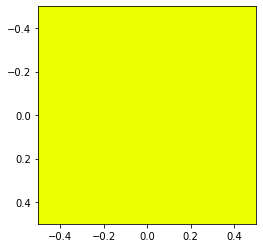

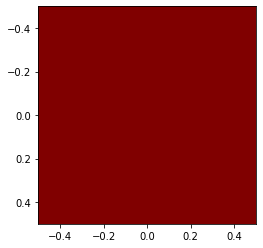

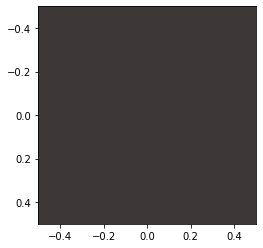

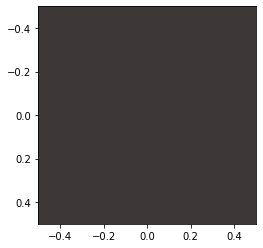

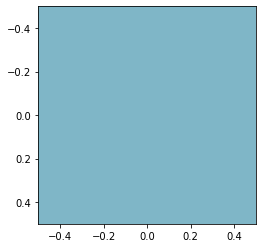

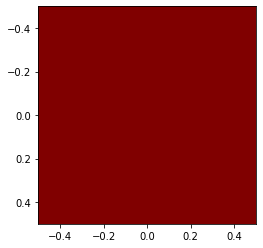

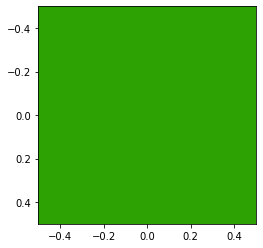

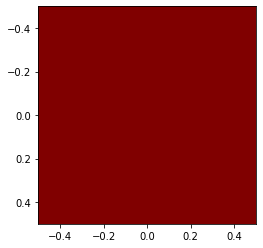

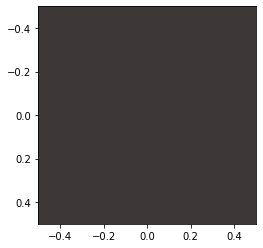

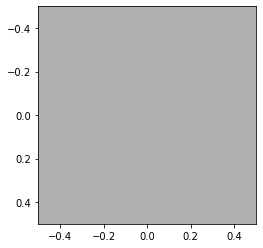

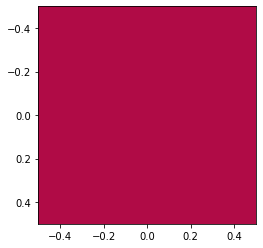

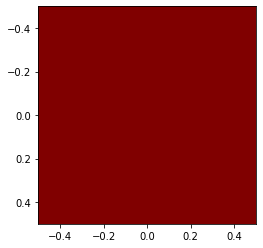

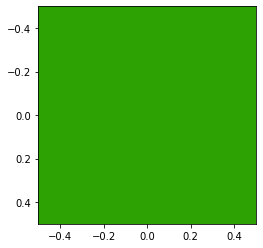

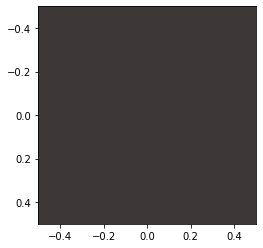

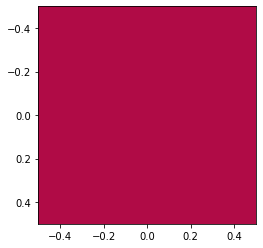

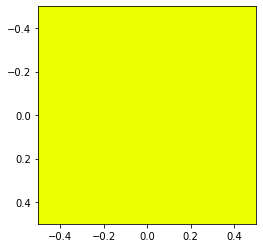

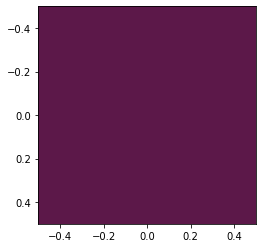

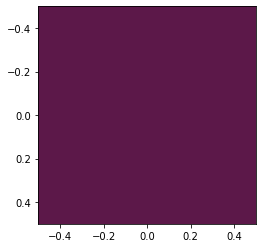

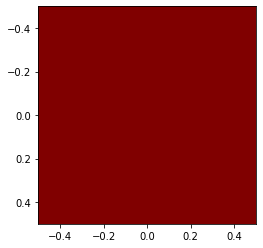

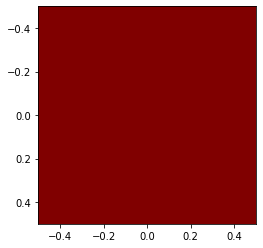

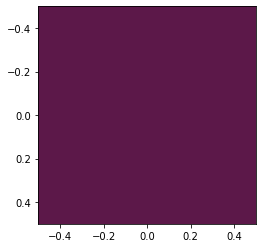

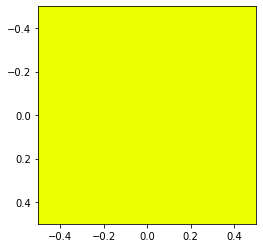

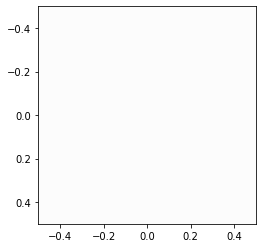

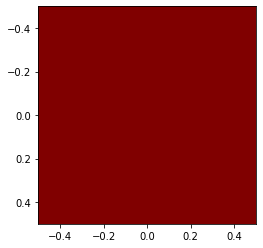

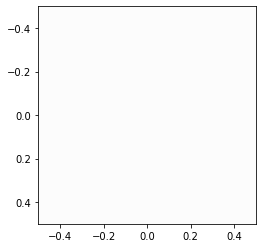

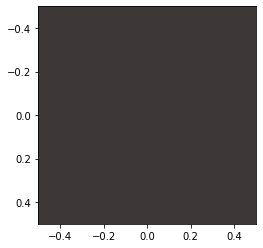

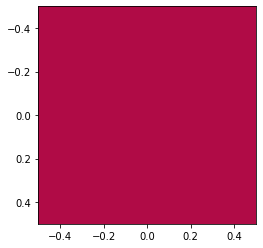

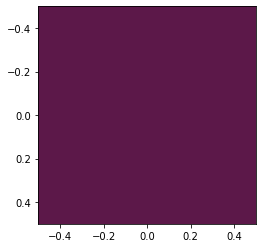

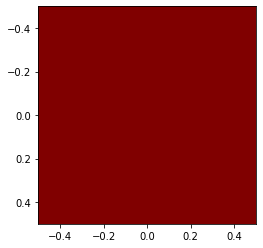

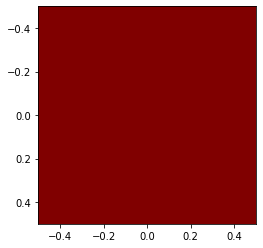

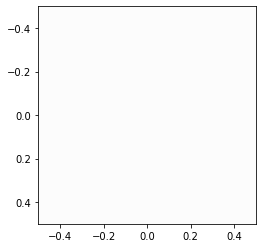

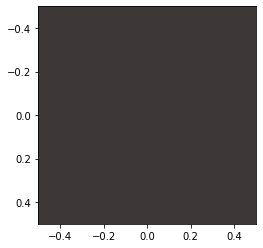

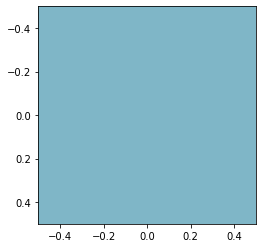

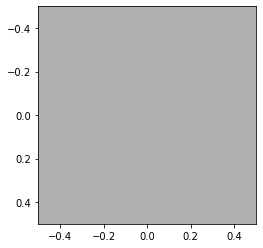

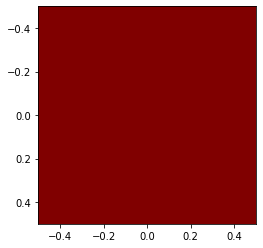

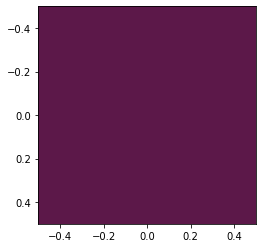

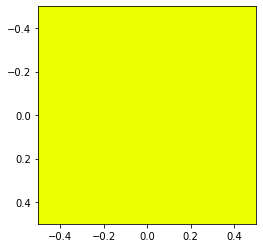

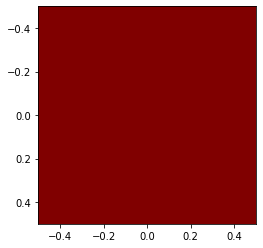

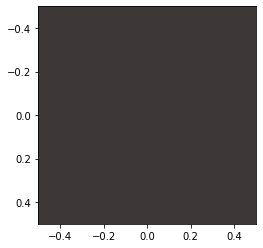

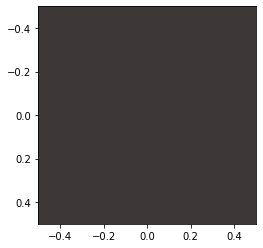

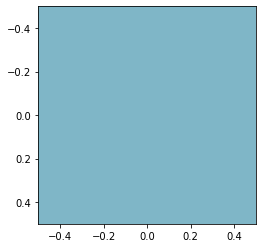

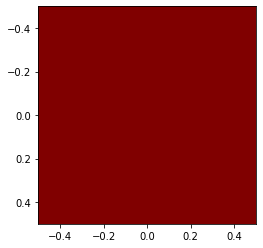

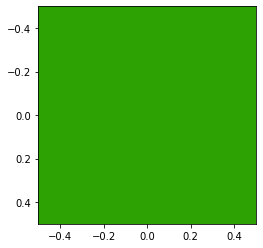

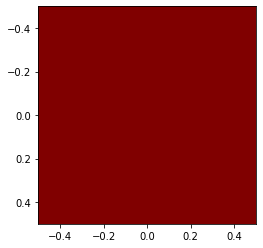

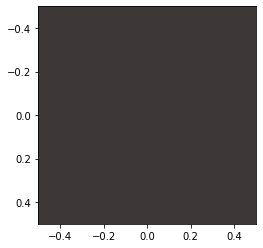

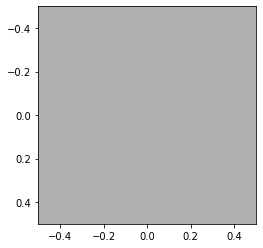

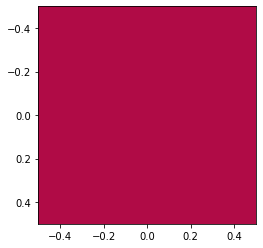

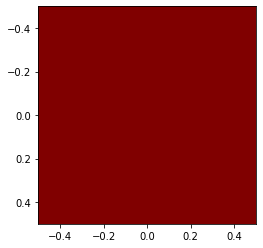

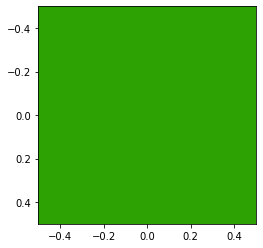

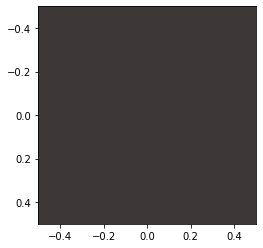

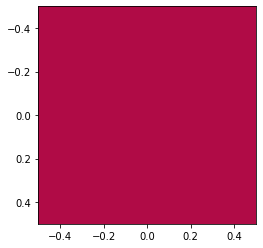

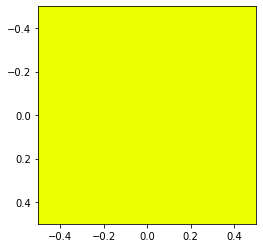

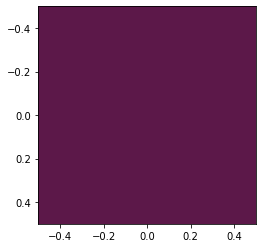

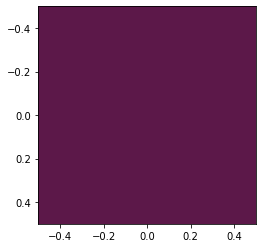

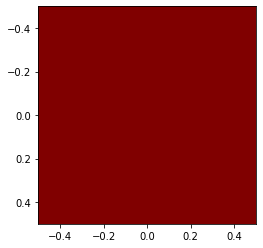

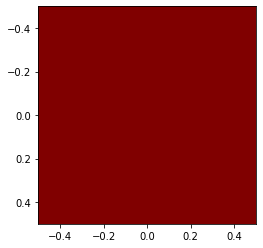

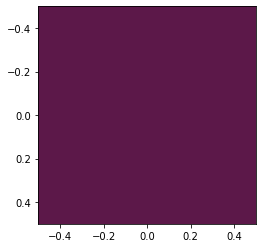

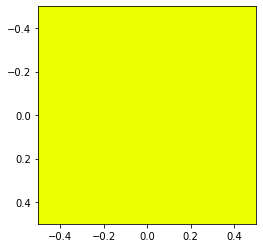

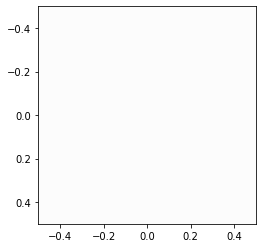

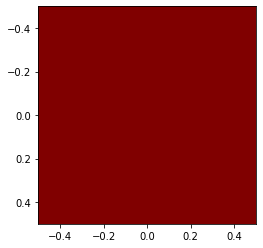

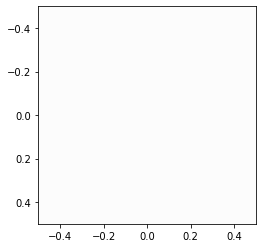

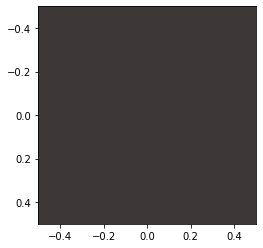

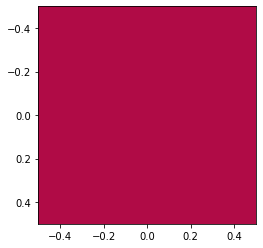

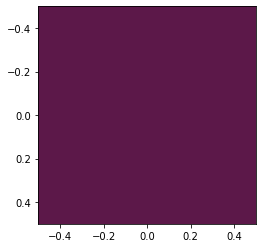

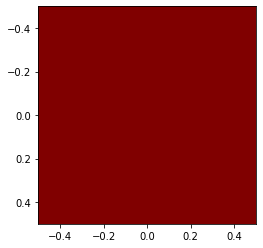

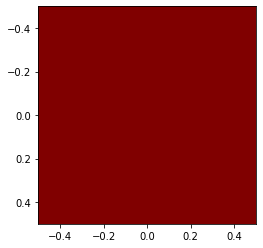

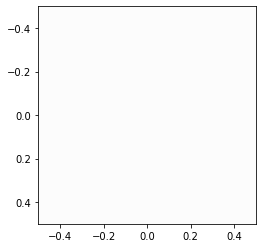

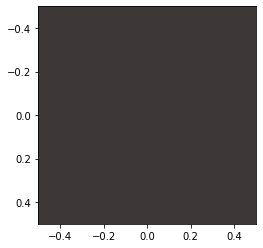

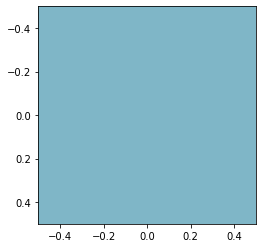

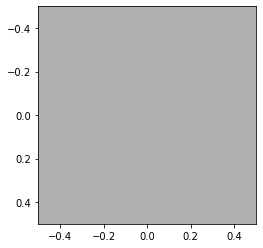

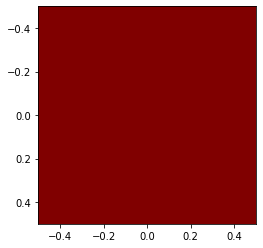

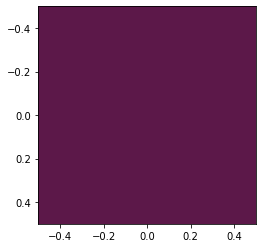

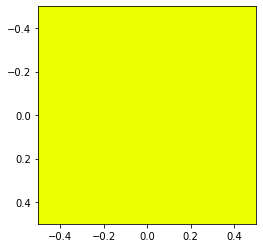

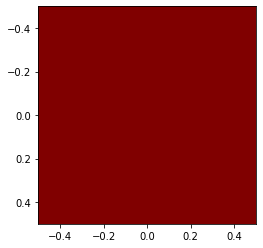

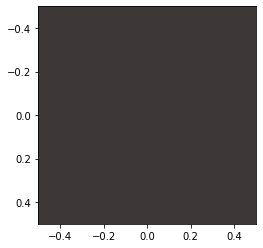

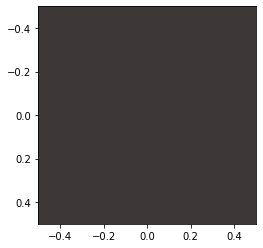

KeyboardInterrupt: ignored

In [214]:
import numpy as np
import matplotlib.pyplot as plt

data_num = 36

fig, axes = plt.subplots(nrows=data_num, ncols=2, sharex=True, sharey=True)
for n in range(data_num):  #row index
    for i in range(data_num):
            plt.figure()
            plt.imshow([[pred_rgb[n]]])
            plt.imshow([[real_rgb[i]]])
            plt.show()

In [ ]:
def predclass(row):
    if row['pred'] < 0.5 :
        val = 0
    elif row['pred'] <= 15 :
        val = 1
    elif row['pred'] <= 45 :
        val = 2
    elif row['pred'] <= 75 :
        val = 3
    elif row['pred'] <= 115 :
        val = 4
    elif row['pred'] <= 165 :
        val = 5
    elif row['pred'] <= 195 :
        val = 6
    elif row['pred'] <= 255 :
        val = 7
    elif row['pred'] <= 285 :
        val = 8
    elif row['pred'] <= 315 :
        val = 9
    elif row['pred'] <= 345 :
        val = 10
    else:
        val = 1
    return val

In [ ]:
compare['kelas asli'] = compare.apply(rc, axis=1)
compare['kelas pred'] = compare.apply(predclass, axis=1)
compare

,hue,pred,kelas asli,kelas pred
0,290.000000,293.267,9,9
1,122.535211,64.0252,5,3
2,0.000000,1.62291,0,1
3,240.000000,228.155,7,7
4,225.882353,233.217,7,7
5,193.176471,193.296,6,6
6,240.000000,229.242,7,7
7,290.000000,291.767,9,9
8,290.000000,292.842,9,9
9,122.535211,56.6261,5,3


In [ ]:
def cek(row):
  if row['kelas asli'] == row['kelas pred'] :
    x = 'true'
  else :
    x = 'false'
  return x

compare['check'] = compare.apply(cek, axis=1)

In [ ]:
compare

,hue,pred,kelas asli,kelas pred,check
0,290.000000,293.267,9,9,true
1,122.535211,64.0252,5,3,false
2,0.000000,1.62291,0,1,false
3,240.000000,228.155,7,7,true
4,225.882353,233.217,7,7,true
5,193.176471,193.296,6,6,true
6,240.000000,229.242,7,7,true
7,290.000000,291.767,9,9,true
8,290.000000,292.842,9,9,true
9,122.535211,56.6261,5,3,false


In [ ]:
clist = compare['check'].values.tolist()
acc = (clist.count('true') / len(compare)) * 100
acc

63.888888888888886

# Predict RF


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf2 = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)
rf2.fit(X_train2, y_train2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
predictions = rf.predict(X_test)
predictions2 = rf2.predict(X_test2)

In [ ]:
hasil = pd.DataFrame({'real' : y_test, 'pred' : predictions})
hasil = hasil.reset_index()

hasil2 = pd.DataFrame({'real' : y_test2, 'pred' : predictions2})
hasil2 = hasil2.reset_index()

In [ ]:
hasil

,index,real,pred
0,134,0.000000,0.000000
1,135,195.000000,195.000000
2,136,225.882353,225.873882
3,137,193.176471,193.176471
4,138,195.000000,195.000000
5,139,349.940120,349.103949
6,140,290.000000,290.000000
7,141,122.535211,113.210947
8,142,0.000000,0.000000
9,143,195.000000,195.000000


In [ ]:
hasil2

,index,real,pred
0,134,7,10
1,135,10,15
2,136,3,3
3,137,9,9
4,138,10,10
5,139,13,15
6,140,2,2
7,141,6,9
8,142,7,9
9,143,10,13


In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test2, predictions2)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test2, predictions2))
# print('precision: {}'.format(precision))
# print('recall: {}'.format(recall))
# print('fscore: {}'.format(fscore))
# print('support: {}'.format(support))

0.3235294117647059


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
hasil['pred'] = hasil['pred'].astype(int)
hasil['real'] = hasil['real'].astype(int)

def f(row):
    if row['real'] == row['pred']:
        val = 1
    else:
        val = 0
    return val

hasil['true'] = hasil.apply(f, axis=1)
hasil.head()


,index,real,pred,true
0,134,0,0,1
1,135,194,194,1
2,136,225,225,1
3,137,193,193,1
4,138,194,194,1


In [ ]:
hasil2['pred'] = hasil2['pred'].astype(int)
hasil2['real'] = hasil2['real'].astype(int)

def f(row):
    if row['real'] == row['pred']:
        val = 1
    else:
        val = 0
    return val

hasil2['true'] = hasil2.apply(f, axis=1)
hasil2.head()


,index,real,pred,true
0,134,7,10,0
1,135,10,15,0
2,136,3,3,1
3,137,9,9,1
4,138,10,10,1


In [ ]:
print(hasil2['true'].value_counts().sort_index())

counts = hasil2['true'].value_counts().tolist()
benar = counts[1]
salah = counts[0]
jumlah = benar + salah

Accuracy = (benar/jumlah) * 100
print('Accuracy : ', round(Accuracy,2), '%')


0    23
1    11
Name: true, dtype: int64
Accuracy :  32.35 %


In [ ]:
hasil = hasil.reset_index()
hasil.to_excel('hasil.xlsx', index=False)

In [ ]:
print(hasil['true'].value_counts())

counts = hasil['true'].value_counts().tolist()
benar = counts[0]
salah = counts[1]
jumlah = benar + salah

Accuracy = (benar/jumlah) * 100
print('Accuracy : ', round(Accuracy,2), '%')


1    29
0     5
Name: true, dtype: int64
Accuracy :  85.29 %


In [ ]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, predictions, squared=False)

#print(round(rmse,2),'%')
print(round(rmse,2))
print(rmse)

2.44
2.4378783347374586


# Neural Network Lama


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, shuffle=False)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y, test_size = 0.2, shuffle=False)


In [ ]:
import numpy as np
from keras.layers import Dense, Activation
from keras.models import Sequential
import tensorflow as tf
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import keras.backend as K # Untuk membuat fungsi R2 Keras
from keras import regularizers # Library untuk mencegah overfitting pada model
from sklearn.preprocessing import MinMaxScaler # Library untuk normalisasi
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
# Inisialisasi class untuk menghentikan proses training apabila akurasi validasi telah diatas 95%
class myCallBack(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mse') <= 0.1):
      print("\mse telah mencapai < 0.5!")
      self.model.stop_training = True
myCallBack = myCallBack()


# sc = StandardScaler()
# X_trainscaled = sc.fit_transform(X_train)
# X_testscaled = sc.fit_transform(X_test)

# sc = MinMaxScaler(feature_range = (0, 1))
# sc1 = MinMaxScaler(feature_range = (-1, 1))
# X_trainscaled = sc.fit_transform(X_train)
# y_trainscaled = sc1.fit_transform(y_train)
# X_testscaled = sc.fit_transform(X_test)

# y_train=np.reshape(y_train, (-1,1))
# y_val=np.reshape(y_val, (-1,1))
# scaler_x = MinMaxScaler()
# scaler_y = MinMaxScaler()
# print(scaler_x.fit(X_train))
# xtrain_scale=scaler_x.transform(X_train)
# print(scaler_x.fit(X_val))
# xval_scale=scaler_x.transform(X_val)
# print(scaler_y.fit(y_train))
# ytrain_scale=scaler_y.transform(y_train)
# print(scaler_y.fit(y_val))
# yval_scale=scaler_y.transform(y_val)

# Model Lama

In [ ]:
# Membuat fungsi untuk koefisien determinasi yang akan digunakan ke dalam model
def r2_keras(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true - y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [ ]:
# Initialising the ANN
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation = 'relu', input_dim = 8), # Adding the input layer and the first hidden layer

    tf.keras.layers.Dense(32, activation = 'relu'), # Adding the second hidden layer

    #tf.keras.layers.Dense(32, activation = 'relu'), # Adding the third hidden layer

    tf.keras.layers.Dense(32, activation = 'relu'),#kernel_regularizer=regularizers.l2(0.003), activation = 'relu'), # Adding the third hidden layer

    #tf.keras.layers.Dropout(0.1), # Adding Dropout layer
    tf.keras.layers.Dense(1)])
# Adding the output layer
#model.add(Dense(units = 1))

#model.compile(optimizer = 'adam',loss = 'mean_squared_error', metrics=['mse'])
model.compile(optimizer=tf.optimizers.RMSprop(learning_rate=0.0001), loss = 'mean_squared_error', metrics=['mse', r2_keras])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_25 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_26 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 33        
Total params: 1,777
Trainable params: 1,777
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist = model.fit(X_train, y_train, epochs = 1000, validation_split=0.05, callbacks=[myCallBack], verbose=1, batch_size = 3)

Epoch 1/1000
43/43 [==============================] - 1s 7ms/step - loss: 439049.5952 - mse: 439049.5952 - r2_keras: -407157156178.4246 - val_loss: 155742.0000 - val_mse: 155742.0000 - val_r2_keras: -545555742720.0000
Epoch 2/1000
43/43 [==============================] - 0s 2ms/step - loss: 240904.6584 - mse: 240904.6541 - r2_keras: -137826253090.0999 - val_loss: 85315.5234 - val_mse: 85315.5156 - val_r2_keras: -298246340608.0000
Epoch 3/1000
43/43 [==============================] - 0s 2ms/step - loss: 98771.1942 - mse: 98771.1942 - r2_keras: -15046052367.7690 - val_loss: 34666.7656 - val_mse: 34666.7656 - val_r2_keras: -110142824448.0000
Epoch 4/1000
43/43 [==============================] - 0s 3ms/step - loss: 29205.6649 - mse: 29205.6649 - r2_keras: -63790909.3916 - val_loss: 22173.5176 - val_mse: 22173.5176 - val_r2_keras: -68742488064.0000
Epoch 5/1000
43/43 [==============================] - 0s 2ms/step - loss: 22613.1949 - mse: 22613.1949 - r2_keras: -37712298821.9060 - val_loss:

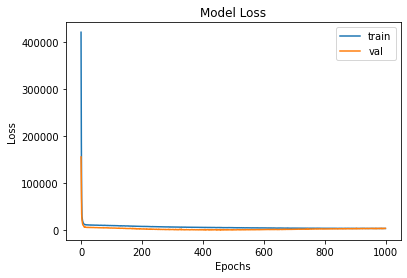

In [ ]:
# Menampilkan plot loss dari model
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

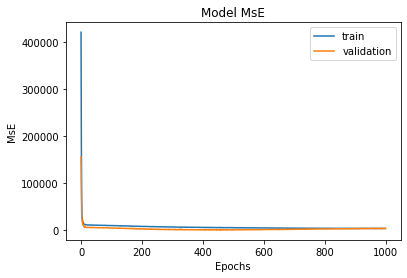

In [ ]:
# Menampilkan plot akurasi dari model
plt.plot(hist.history['mse'])
plt.plot(hist.history['val_mse'])
plt.title('Model MsE')
plt.ylabel('MsE')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
y_pred = model.predict(X_test)
#y_pred
y_pred2 = np.minimum(500., np.maximum(0, model.predict(X_test)))
#y_pred2

In [ ]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse2 = mean_squared_error(y_test, y_pred2, squared=False)
print(rmse)
print(rmse2)

53.8427925345229
50.31706292634379


In [ ]:
#y_test

In [ ]:
y_pred2 = y_pred2.tolist()
y_pred2 = pd.Series(y_pred2)
y_pred2 = y_pred2.explode()
y_pred2

0           0
1      245.48
2     276.074
3     170.207
4     273.856
5     230.981
6     244.447
7     150.816
8           0
9     268.757
10    262.649
11    215.762
12    272.171
13    264.961
14    224.902
15    156.543
16    268.786
17    257.611
18    279.726
19    269.512
20    39.5704
21    255.793
22    254.281
23    258.672
24    244.945
25    220.698
26     223.39
27    257.469
28     255.52
29    261.566
30    252.214
31    258.883
32    210.306
33          0
dtype: object

In [ ]:
# # for i in range (10):
# #     print('a')
# #     plt.imshow(X_test3['rgb'].values)

# X_test3 = X_test3.astype({"rgb": int})
# plt.imshow(X_test3['rgb'].values)


In [ ]:
y_test = y_test.reset_index(drop=True)
compare = pd.DataFrame({'real' : y_test, 'pred' : y_pred2})
#compare = pd.DataFrame(y_test, y_pred, axis=1)

compare

,real,pred
0,0.000000,0
1,240.000000,245.48
2,225.882353,276.074
3,193.176471,170.207
4,240.000000,273.856
5,349.940120,230.981
6,290.000000,244.447
7,122.535211,150.816
8,0.000000,0
9,240.000000,268.757


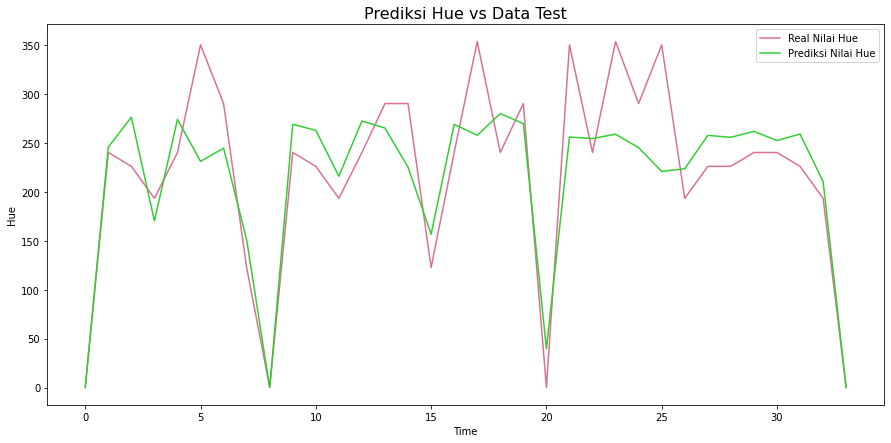

In [ ]:
# Membuat diagram garis untuk memperlihatkan ke akuratan hasil prediksi dan nilai real pada dataset
# Data prediksi vs data test

plt.figure(figsize=(15,7))
plt.plot(compare['real'], color = 'palevioletred', label = 'Real Nilai Hue')
plt.plot(compare['pred'], color = 'limegreen', label = 'Prediksi Nilai Hue')
plt.title('Prediksi Hue vs Data Test',fontsize = 16)
plt.xlabel('Time')
plt.ylabel('Hue')
plt.legend()
plt.show()

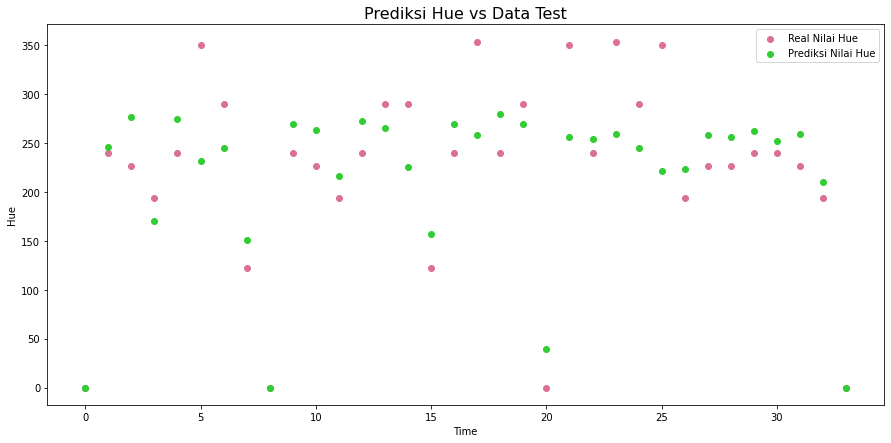

In [ ]:
# Membuat diagram garis untuk memperlihatkan ke akuratan hasil prediksi dan nilai real pada dataset
# Data prediksi vs data test

plt.figure(figsize=(15,7))
plt.scatter(x=compare.index, y=compare['real'], color = 'palevioletred', label = 'Real Nilai Hue')
plt.scatter(x=compare.index, y=compare['pred'], color = 'limegreen', label = 'Prediksi Nilai Hue')
plt.title('Prediksi Hue vs Data Test',fontsize = 16)
plt.xlabel('Time')
plt.ylabel('Hue')
plt.legend()
plt.show()

In [ ]:
"""
 NeuralNetwork.py  (author: Anson Wong / git: ankonzoid)
"""
# import math, random
# import numpy as np

# class Neural:

#     def __init__(self, input_dim=None, output_dim=None, hidden_layers=None, seed=1):
#         if (input_dim is None) or (output_dim is None) or (hidden_layers is None):
#             raise Exception("Invalid arguments given!")
#         self.input_dim = input_dim # number of input nodes
#         self.output_dim = output_dim # number of output nodes
#         self.hidden_layers = hidden_layers # number of hidden nodes @ each layer
#         self.network = self._build_network(seed=seed)

#     # Train network
#     def train(self, X, y, eta=0.5, n_epochs=200):
#         for epoch in range(n_epochs):
#             for (x_, y_) in zip(X, y):
#                 self._forward_pass(x_) # forward pass (update node["output"])
#                 yhot_ = self._one_hot_encoding(y_, self.output_dim) # one-hot target
#                 self._backward_pass(yhot_) # backward pass error (update node["delta"])
#                 self._update_weights(x_, eta) # update weights (update node["weight"])

#     # Predict using argmax of logits
#     def predict(self, X):
#         ypred = np.array([np.argmax(self._forward_pass(x_)) for x_ in X], dtype=np.int)
#         return ypred

#     # ==============================
#     #
#     # Internal functions
#     #
#     # ==============================

#     # Build fully-connected neural network (no bias terms)
#     def _build_network(self, seed=1):
#         random.seed(seed)

#         # Create a single fully-connected layer
#         def _layer(input_dim, output_dim):
#             layer = []
#             for i in range(output_dim):
#                 weights = [random.random() for _ in range(input_dim)] # sample N(0,1)
#                 node = {"weights": weights, # list of weights
#                         "output": None, # scalar
#                         "delta": None} # scalar
#                 layer.append(node)
#             return layer

#         # Stack layers (input -> hidden -> output)
#         network = []
#         if len(self.hidden_layers) == 0:
#             network.append(_layer(self.input_dim, self.output_dim))
#         else:
#             network.append(_layer(self.input_dim, self.hidden_layers[0]))
#             for i in range(1, len(self.hidden_layers)):
#                 network.append(_layer(self.hidden_layers[i-1], self.hidden_layers[i]))
#             network.append(_layer(self.hidden_layers[-1], self.output_dim))

#         return network

#     # Forward-pass (updates node['output'])
#     def _forward_pass(self, x):
#         transfer = self._sigmoid
#         x_in = x
#         for layer in self.network:
#             x_out = []
#             for node in layer:
#                 node['output'] = transfer(self._dotprod(node['weights'], x_in))
#                 x_out.append(node['output'])
#             x_in = x_out # set output as next input
#         return x_in

#     # Backward-pass (updates node['delta'], L2 loss is assumed)
#     def _backward_pass(self, yhot):
#         transfer_derivative = self._sigmoid_derivative # sig' = f(sig)
#         n_layers = len(self.network)
#         for i in reversed(range(n_layers)): # traverse backwards
#             if i == n_layers - 1:
#                 # Difference between logits and one-hot target
#                 for j, node in enumerate(self.network[i]):
#                     err = node['output'] - yhot[j]
#                     node['delta'] = err * transfer_derivative(node['output'])
#             else:
#                 # Weighted sum of deltas from upper layer
#                 for j, node in enumerate(self.network[i]):
#                     err = sum([node_['weights'][j] * node_['delta'] for node_ in self.network[i+1]])
#                     node['delta'] = err * transfer_derivative(node['output'])

#     # Update weights (updates node['weight'])
#     def _update_weights(self, x, eta):
#         for i, layer in enumerate(self.network):
#             # Grab input values
#             if i == 0: inputs = x
#             else: inputs = [node_['output'] for node_ in self.network[i-1]]
#             # Update weights
#             for node in layer:
#                 for j, input in enumerate(inputs):
#                     # dw = - learning_rate * (error * transfer') * input
#                     node['weights'][j] += - eta * node['delta'] * input

#     # Dot product
#     def _dotprod(self, a, b):
#         return sum([a_ * b_ for (a_, b_) in zip(a, b)])

#     # Sigmoid (activation function)
#     def _sigmoid(self, x):
#         return 1.0/(1.0+math.exp(-x))

#     # Sigmoid derivative
#     def _sigmoid_derivative(self, sigmoid):
#         return sigmoid*(1.0-sigmoid)

#     # One-hot encoding
#     def _one_hot_encoding(self, idx, output_dim):
#         x = np.zeros(output_dim, dtype=np.int)
#         x[idx] = 1
#         return x

'\n NeuralNetwork.py  (author: Anson Wong / git: ankonzoid)\n'

In [ ]:
"""
 utils.py  (author: Anson Wong / git: ankonzoid)
"""
# import numpy as np
# import pandas as pd


# # Read csv file for (X, y, n_classes) data
# def read_csv(csv_filename, target_name="y", normalize=False):
#     df = pd.read_csv(csv_filename, delimiter=",", dtype={target_name: str})
#     if list(df.columns.values).count(target_name) != 1: # check target
#         raise Exception("Need exactly 1 count of '{}' in {}".format(target_name, csv_filename))
#     target2idx = {target: idx for idx, target in enumerate(sorted(list(set(df[target_name].values))))}
#     X = df.drop([target_name], axis=1).values
#     y = np.vectorize(lambda x: target2idx[x])(df[target_name].values)
#     n_classes = len(target2idx.keys())
#     if X.shape[0] != y.shape[0]:
#         raise Exception("X.shape = {} and y.shape = {} are inconsistent!".format(X.shape, y.shape))
#     if normalize:
#         X = (X - X.mean(axis=0)) / X.std(axis=0)
#     return X, y, n_classes

# # Randomly permute [0,N] and extract indices for each fold
# def crossval_folds(N, n_folds, seed=1):
#     np.random.seed(seed)
#     idx_all_permute = np.random.permutation(N)
#     N_fold = int(N/n_folds)
#     idx_folds = []
#     for i in range(n_folds):
#         start = i*N_fold
#         end = min([(i+1)*N_fold, N])
#         idx_folds.append(idx_all_permute[start:end])
#     return idx_folds

In [ ]:
# '''
#  NN_scratch.py  (author: Anson Wong / git: ankonzoid)
#  We train a multi-layer fully-connected neural network from scratch to classify
#  the seeds dataset (https://archive.ics.uci.edu/ml/datasets/seeds). An L2 loss
#  function, sigmoid activation, and no bias terms are assumed. The weight
#  optimization is gradient descent via the delta rule.
# '''
# import numpy as np
# #from src.NN import NN
# #import src.utils as utils
# #NN = Neural()
# utils = Utils()

# # Settings
# csv_filename = "/content/seeds_dataset.csv"
# hidden_layers = [5] # number of nodes in hidden layers i.e. [layer1, layer2, ...]
# eta = 0.1 # learning rate
# n_epochs = 400 # number of training epochs
# n_folds = 4 # number of folds for cross-validation
# seed_crossval = 1 # seed for cross-validation
# seed_weights = 1 # seed for NN weight initialization

# # Read csv data + normalize features
# print("Reading '{}'...".format(csv_filename))
# X, y, n_classes = read_csv(csv_filename, target_name="y", normalize=True)
# print(" -> X.shape = {}, y.shape = {}, n_classes = {}\n".format(X.shape, y.shape, n_classes))
# N, d = X.shape

# print("Neural network model:")
# print(" input_dim = {}".format(d))
# print(" hidden_layers = {}".format(hidden_layers))
# print(" output_dim = {}".format(n_classes))
# print(" eta = {}".format(eta))
# print(" n_epochs = {}".format(n_epochs))
# print(" n_folds = {}".format(n_folds))
# print(" seed_crossval = {}".format(seed_crossval))
# print(" seed_weights = {}\n".format(seed_weights))

# # Create cross-validation folds
# idx_all = np.arange(0, N)
# idx_folds = crossval_folds(N, n_folds, seed=seed_crossval) # list of list of fold indices

# # Train/evaluate the model on each fold
# acc_train, acc_valid = list(), list()
# print("Cross-validating with {} folds...".format(len(idx_folds)))
# for i, idx_valid in enumerate(idx_folds):

#     # Collect training and test data from folds
#     idx_train = np.delete(idx_all, idx_valid)
#     X_train, y_train = X[idx_train], y[idx_train]
#     X_valid, y_valid = X[idx_valid], y[idx_valid]

#     # Build neural network classifier model and train
#     model = NN(input_dim=d, output_dim=n_classes,
#                hidden_layers=hidden_layers, seed=seed_weights)
#     model.train(X_train, y_train, eta=eta, n_epochs=n_epochs)

#     # Make predictions for training and test data
#     ypred_train = model.predict(X_train)
#     ypred_valid = model.predict(X_valid)

#     # Compute training/test accuracy score from predicted values
#     acc_train.append(100*np.sum(y_train==ypred_train)/len(y_train))
#     acc_valid.append(100*np.sum(y_valid==ypred_valid)/len(y_valid))

#     # Print cross-validation result
#     print(" Fold {}/{}: acc_train = {:.2f}%, acc_valid = {:.2f}% (n_train = {}, n_valid = {})".format(
#         i+1, n_folds, acc_train[-1], acc_valid[-1], len(X_train), len(X_valid)))

# # Print results
# print("  -> acc_train_avg = {:.2f}%, acc_valid_avg = {:.2f}%".format(
#     sum(acc_train)/float(len(acc_train)), sum(acc_valid)/float(len(acc_valid))))